In [1]:
import re
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
#plt.style.use('seaborn')
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from datetime import datetime

In [2]:
 # Load data 
#mta = pd.read_csv('C:/Users/keith/Desktop/Thinkful/mta_1706.csv',encoding = "ISO-8859-1",error_bad_lines=False)
mta_bus = pd.read_csv('C:/Users/keith/Desktop/Thinkful/mta_1706_1.csv',encoding = "ISO-8859-1",error_bad_lines=False)
pd.set_option('display.max_columns', 50)

b'Skipping line 53192: expected 17 fields, saw 18\nSkipping line 56712: expected 17 fields, saw 18\nSkipping line 64874: expected 17 fields, saw 18\n'
b'Skipping line 80636: expected 17 fields, saw 18\nSkipping line 97072: expected 17 fields, saw 18\n'
b'Skipping line 107697: expected 17 fields, saw 18\nSkipping line 109317: expected 17 fields, saw 18\nSkipping line 119951: expected 17 fields, saw 18\n'
b'Skipping line 134667: expected 17 fields, saw 18\nSkipping line 139923: expected 17 fields, saw 18\nSkipping line 144309: expected 17 fields, saw 18\nSkipping line 157927: expected 17 fields, saw 18\nSkipping line 158907: expected 17 fields, saw 18\nSkipping line 161424: expected 17 fields, saw 18\n'
b'Skipping line 173221: expected 17 fields, saw 18\nSkipping line 173623: expected 17 fields, saw 18\nSkipping line 177253: expected 17 fields, saw 18\nSkipping line 181883: expected 17 fields, saw 18\nSkipping line 186684: expected 17 fields, saw 18\nSkipping line 191267: expected 17 fie

b'Skipping line 2831078: expected 17 fields, saw 18\nSkipping line 2831884: expected 17 fields, saw 18\nSkipping line 2832778: expected 17 fields, saw 18\n'
b'Skipping line 2935466: expected 17 fields, saw 18\nSkipping line 2937968: expected 17 fields, saw 18\n'
b'Skipping line 2952504: expected 17 fields, saw 18\n'
b'Skipping line 2982958: expected 17 fields, saw 18\nSkipping line 2991335: expected 17 fields, saw 18\nSkipping line 3006710: expected 17 fields, saw 18\nSkipping line 3013361: expected 17 fields, saw 18\n'
b'Skipping line 3019557: expected 17 fields, saw 18\nSkipping line 3032671: expected 17 fields, saw 18\n'
b'Skipping line 3068454: expected 17 fields, saw 18\nSkipping line 3079236: expected 17 fields, saw 18\n'
b'Skipping line 3081942: expected 17 fields, saw 18\nSkipping line 3095240: expected 17 fields, saw 18\n'
b'Skipping line 3166450: expected 17 fields, saw 18\nSkipping line 3178126: expected 17 fields, saw 18\n'
b'Skipping line 3192452: expected 17 fields, saw 1

b'Skipping line 5158386: expected 17 fields, saw 18\n'
b'Skipping line 5278636: expected 17 fields, saw 18\n'
b'Skipping line 5389023: expected 17 fields, saw 18\nSkipping line 5393062: expected 17 fields, saw 18\n'
b'Skipping line 5410409: expected 17 fields, saw 18\n'
b'Skipping line 5444054: expected 17 fields, saw 18\n'
b'Skipping line 5496628: expected 17 fields, saw 18\nSkipping line 5496629: expected 17 fields, saw 18\n'
b'Skipping line 5510776: expected 17 fields, saw 18\n'
b'Skipping line 5548626: expected 17 fields, saw 18\nSkipping line 5551773: expected 17 fields, saw 18\nSkipping line 5556312: expected 17 fields, saw 18\nSkipping line 5570453: expected 17 fields, saw 18\n'
b'Skipping line 5577387: expected 17 fields, saw 18\nSkipping line 5580723: expected 17 fields, saw 18\nSkipping line 5582075: expected 17 fields, saw 18\nSkipping line 5596334: expected 17 fields, saw 18\nSkipping line 5602325: expected 17 fields, saw 18\n'
b'Skipping line 5606005: expected 17 fields, s

In [3]:
#take sample because the full set is too much to try to analyze on local machine
mta = mta_bus.sample(n=20000,random_state=20)

# Data Description

In [4]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
249431,2017-06-02 00:05:00,1,Q17,138 ST/37 AV,40.761806,-73.829559,JAMAICA ARCHER AV,40.704933,-73.793320,NYCT_8442,40.712529,-73.784314,HILLSIDE AV/EDGERTON BL,approaching,128.0,NaN,23:58:34
5083624,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,0.9 miles away,1427.0,2017-06-23 16:26:00,16:26:16
2001707,2017-06-09 17:38:05,1,Bx9,NaN,NaN,NaN,WEST FARMS,40.840641,-73.879807,NYCT_1214,40.879992,-73.904038,BROADWAY/W 231 ST,approaching,120.0,2017-06-09 17:39:19,NaN
2315680,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,< 1 stop away,154.0,2017-06-11 15:11:24,14:59:05
2230060,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,approaching,104.0,2017-06-10 22:20:58,22:21:22


In [5]:
 mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 249431 to 5634610
Data columns (total 17 columns):
RecordedAtTime               20000 non-null object
DirectionRef                 20000 non-null int64
PublishedLineName            20000 non-null object
OriginName                   19821 non-null object
OriginLat                    19821 non-null float64
OriginLong                   19821 non-null float64
DestinationName              20000 non-null object
DestinationLat               19981 non-null float64
DestinationLong              19981 non-null float64
VehicleRef                   20000 non-null object
VehicleLocation.Latitude     20000 non-null float64
VehicleLocation.Longitude    20000 non-null float64
NextStopPointName            19973 non-null object
ArrivalProximityText         19973 non-null object
DistanceFromStop             19973 non-null float64
ExpectedArrivalTime          17362 non-null object
ScheduledArrivalTime         19505 non-null object
dtypes: flo

In [6]:
mta.shape

(20000, 17)

# Data cleaning

In [7]:
mta.duplicated().sum()

0

In [8]:
#pd.set_option('display.max_columns', None) # disables trucated columns 
#pd.set_option('display.max_rows', None) # disables trucated rows
mta.head()   

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
249431,2017-06-02 00:05:00,1,Q17,138 ST/37 AV,40.761806,-73.829559,JAMAICA ARCHER AV,40.704933,-73.793320,NYCT_8442,40.712529,-73.784314,HILLSIDE AV/EDGERTON BL,approaching,128.0,NaN,23:58:34
5083624,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,0.9 miles away,1427.0,2017-06-23 16:26:00,16:26:16
2001707,2017-06-09 17:38:05,1,Bx9,NaN,NaN,NaN,WEST FARMS,40.840641,-73.879807,NYCT_1214,40.879992,-73.904038,BROADWAY/W 231 ST,approaching,120.0,2017-06-09 17:39:19,NaN
2315680,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,< 1 stop away,154.0,2017-06-11 15:11:24,14:59:05
2230060,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,approaching,104.0,2017-06-10 22:20:58,22:21:22


In [9]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime'],
      dtype='object')

In [10]:
mta.columns=['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime']

In [11]:
mta.isnull().sum()

RecordedAtTime             0
DirectionRef               0
PublishedLineName          0
OriginName               179
OriginLat                179
OriginLong               179
DestinationName            0
DestinationLat            19
DestinationLong           19
VehicleRef                 0
VehicleLocation_Lat        0
VehicleLocation_Long       0
NextStopPointName         27
ArrivalProximityText      27
DistanceFromStop          27
ExpectedArrivalTime     2638
ScheduledArrivalTime     495
dtype: int64

In [12]:
(mta.isnull().sum()/mta.isnull().count()*100).astype(str)+" %"

RecordedAtTime            0.0 %
DirectionRef              0.0 %
PublishedLineName         0.0 %
OriginName              0.895 %
OriginLat               0.895 %
OriginLong              0.895 %
DestinationName           0.0 %
DestinationLat          0.095 %
DestinationLong         0.095 %
VehicleRef                0.0 %
VehicleLocation_Lat       0.0 %
VehicleLocation_Long      0.0 %
NextStopPointName       0.135 %
ArrivalProximityText    0.135 %
DistanceFromStop        0.135 %
ExpectedArrivalTime     13.19 %
ScheduledArrivalTime    2.475 %
dtype: object

We need to drop the rows with missing arrival times. It is usless to us if we can't find the bus is late or not.

In [13]:
mta = mta[mta.ExpectedArrivalTime.isnull()==False]  
mta.isnull().sum()
 

RecordedAtTime            0
DirectionRef              0
PublishedLineName         0
OriginName              151
OriginLat               151
OriginLong              151
DestinationName           0
DestinationLat           11
DestinationLong          11
VehicleRef                0
VehicleLocation_Lat       0
VehicleLocation_Long      0
NextStopPointName         0
ArrivalProximityText      0
DistanceFromStop          0
ExpectedArrivalTime       0
ScheduledArrivalTime    151
dtype: int64

In [14]:
mta = mta[mta.ScheduledArrivalTime.isnull()==False]
mta.isnull().sum()

RecordedAtTime          0
DirectionRef            0
PublishedLineName       0
OriginName              0
OriginLat               0
OriginLong              0
DestinationName         0
DestinationLat          0
DestinationLong         0
VehicleRef              0
VehicleLocation_Lat     0
VehicleLocation_Long    0
NextStopPointName       0
ArrivalProximityText    0
DistanceFromStop        0
ExpectedArrivalTime     0
ScheduledArrivalTime    0
dtype: int64

In [15]:
len(mta)/200000

0.086055

In [16]:
# reindex dataset
mta.index = range(len(mta.index))

That took care of all of our null values, that we can tell anyway.

Next we need to create a target variable. We are trying to predict if a bus is going to be late or not so we will convert the time rows in to manageable data and the find the difference in times.

In [17]:
# modifying "ScheduledArrivalTime" format to match "EstimatedArrivalTime"
mta.loc[list(np.where(mta.ScheduledArrivalTime=='24:00:00')[0]),'ScheduledArrivalTime'] = '00:00:01'
mta['ScheduledArrivalTime'] = pd.to_timedelta(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_timedelta(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)

# converting "ExpectedArrivalTime" to datetime format and them finding the diffence between ScheduledArrivalTime
# "ExpectedArrivalTime"
mta['ExpectedArrivalTime'] = pd.to_datetime(mta.ExpectedArrivalTime)
mta['ScheduledArrivalTime'] = mta.ExpectedArrivalTime.dt.date.astype('str') +' '+ mta.ScheduledArrivalTime.dt.time.astype('str')
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)
index = mta[(mta.ScheduledArrivalTime.dt.hour==23) & (mta.ExpectedArrivalTime.dt.hour==00)].index
mta.loc[index,'ScheduledArrivalTime'] = mta.ScheduledArrivalTime + pd.DateOffset(days=-1)

# Finally creating a binary target "Late_bus"
mta.loc[list(np.where(mta.ExpectedArrivalTime>mta.ScheduledArrivalTime)[0]),'Time_delay'] = pd.to_datetime(mta.ExpectedArrivalTime -  mta.ScheduledArrivalTime).dt.minute 
mta.loc[list(np.where(mta.ExpectedArrivalTime<mta.ScheduledArrivalTime)[0]),'Time_delay'] = pd.to_datetime(mta.ScheduledArrivalTime - mta.ExpectedArrivalTime ).dt.minute*-1
mta.loc[list(np.where(mta.Time_delay.isna()==True)[0]),'Time_delay'] = 0

mta['Late_Bus'] = np.where(mta.Time_delay>7, 1, 0)

In [18]:
# checking to make sure that time is only in the month of June
mta.ScheduledArrivalTime.dt.month.unique()

array([6], dtype=int64)

In [19]:
mta.drop(list(np.where(mta.ScheduledArrivalTime.dt.month==5)[0]),axis='index',inplace=True)
# reindex dataset
mta.index = range(len(mta.index))
mta.ScheduledArrivalTime.dt.month.unique()

array([6], dtype=int64)

In [20]:
# test to see if it worked from a sample
mta.sample(frac=.001).head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus
8657,2017-06-19 06:43:54,1,M15-SBS,E 126 ST/2 AV,40.803230,-73.932449,SELECT BUS SERVICE SOUTH FERRY via 2 AV,40.702122,-74.013664,NYCT_1267,40.759557,-73.965111,2 AV/E 57 ST,approaching,74.0,2017-06-19 06:44:15,2017-06-19 06:36:46,7.0,0
5870,2017-06-01 18:14:07,0,M101,ASTOR PL/3 AV,40.729568,-73.990051,LTD 96 ST,40.785725,-73.948792,NYCT_5263,40.738495,-73.983391,3 AV/E 23 ST,approaching,96.0,2017-06-01 18:14:40,2017-06-01 18:01:00,13.0,1
12266,2017-06-09 17:18:43,1,Bx6,FOOD CENTER DR/MARKET ST,40.810043,-73.876694,RIVERSIDE DR,40.836205,-73.948479,NYCT_7732,40.822533,-73.902383,E 163 ST/TINTON AV,approaching,113.0,2017-06-09 17:19:40,2017-06-09 17:20:06,0.0,0
6922,2017-06-28 15:39:09,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_5015,40.676285,-73.939046,DEAN ST/ALBANY AV,approaching,60.0,2017-06-28 15:39:37,2017-06-28 14:58:44,40.0,1
6066,2017-06-01 19:35:04,1,M31,E 92 ST/YORK AV,40.779755,-73.944534,CLINTON 11 AV via 57 ST,40.768192,-73.992546,NYCT_3827,40.768253,-73.992502,W 54 ST/11 AV,at stop,0.0,2017-06-01 19:35:18,2017-06-01 19:22:00,13.0,1


The conversion worked. We created a feature 'Time_delay' where the values are the minutes of delay ot the bus. Values that are greater than zero are the number of minutes past the scheduled arrival time. The values that are less that zero are the number of minutes the bus arrived ahead of schedule.

The 'Late_Bus' feature is labels a '1' for a bus who's arrival time is greater than 15 min past the scheduled arrival time and labels a '0' for anything under that time. This is our target

In [21]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus
0,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,0.9 miles away,1427.0,2017-06-23 16:26:00,2017-06-23 16:26:16,0.0,0
1,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,< 1 stop away,154.0,2017-06-11 15:11:24,2017-06-11 14:59:05,12.0,1
2,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,approaching,104.0,2017-06-10 22:20:58,2017-06-10 22:21:22,0.0,0
3,2017-06-14 10:06:11,1,B62,JACKSON AV/QUEENS PZ S,40.748638,-73.938446,DOWNTOWN BKLYN FULTON MALL,40.690407,-73.989471,NYCT_4519,40.712838,-73.960482,DRIGGS AV/S 2 ST,approaching,49.0,2017-06-14 10:06:27,2017-06-14 09:59:15,7.0,0
4,2017-06-28 17:09:54,1,Q76,132 ST/20 AV,40.782063,-73.836716,JAMAICA 165 ST TERM via F LEWIS,40.707615,-73.795540,NYCT_4195,40.715189,-73.773367,HILLSIDE AV/188 ST,at stop,8.0,2017-06-28 17:10:08,2017-06-28 17:03:28,6.0,0


In [22]:
mta.Late_Bus.value_counts()

0    12626
1     4585
Name: Late_Bus, dtype: int64

    Next, "ArrivalProximityText" and "DistanceFromStop" are redundant variables so one can be dropped.

In [23]:
mta.drop("ArrivalProximityText",1,inplace=True)

In [24]:
# convert the categorical variables to the correct data type
columns = ['DirectionRef','PublishedLineName','OriginName',
           'DestinationName','VehicleRef','NextStopPointName']
for col in columns:
    mta[col] = mta[col].astype('category')
    
mta['RecordedAtTime'] = pd.to_datetime(mta.RecordedAtTime)

In [25]:
# breaking up "ScheduledArrivalTime" into components
mta['day'] = pd.to_numeric(mta.ScheduledArrivalTime.dt.day)
mta['hour'] = pd.to_numeric(mta.ScheduledArrivalTime.dt.hour)
mta['minute'] = pd.to_numeric(mta.ScheduledArrivalTime.dt.minute)
mta['weekday'] = mta.ScheduledArrivalTime.dt.day_name().astype('category')
mta['day_of_week'] = pd.to_numeric(mta.ScheduledArrivalTime.dt.weekday)

In [26]:
# sort dataframe by Scheduled arrival time
mta.index = mta.ScheduledArrivalTime
mta = mta.sort_index()
mta.index = range(len(mta))

In [27]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,day,hour,minute,weekday,day_of_week
0,2017-06-01 00:03:30,1,X17,E 57 ST/3 AV,40.760429,-73.967674,ARDEN HTS HUGENOT AV via NJ via DRMGOOLE,40.543644,-74.196716,NYCT_2725,40.563053,-74.175912,ARTHUR KILL RD/ANNADALE RD,157.0,2017-06-01 00:03:56,2017-06-01 00:01:32,2.0,0,1,0,1,Thursday,3
1,2017-06-01 00:13:31,0,Q30,ARCHER AV /SUTPHIN BL,40.700489,-73.807884,LITTLE NECK L NECK PKY,40.764297,-73.725914,NYCT_8443,40.764774,-73.725227,NASSAU BL/LITTLE NECK PY,77.0,2017-06-01 00:13:57,2017-06-01 00:02:00,11.0,1,1,0,2,Thursday,3
2,2017-06-01 00:03:40,1,Bx36,RANDALL AV/OLMSTEAD AV,40.818676,-73.851555,WASHINGTON HTS GW BRIDGE,40.849033,-73.937309,NYCT_281,40.822321,-73.855112,LAFAYETTE AV/PUGSLEY AV,29.0,2017-06-01 00:03:56,2017-06-01 00:02:51,1.0,0,1,0,2,Thursday,3
3,2017-06-01 00:13:47,0,Q17,MERRICK BL/ARCHER AV,40.704906,-73.793304,FLUSHING MAIN ST STA,40.761745,-73.829529,NYCT_8417,40.740906,-73.787620,HORACE HARDING EXP/185 ST,162.0,2017-06-01 00:14:07,2017-06-01 00:09:53,4.0,0,1,0,9,Thursday,3
4,2017-06-01 00:13:38,0,B38,TILLARY ST/CADMAN PZ E,40.696106,-73.990364,RIDGEWOOD METRO AV,40.713341,-73.914688,NYCT_7228,40.687247,-73.976757,FULTON ST/LAFAYETTE AV,10.0,2017-06-01 00:13:57,2017-06-01 00:14:50,0.0,0,1,0,14,Thursday,3


# Exploratory Data Analysis

In [28]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime', 'Time_delay', 'Late_Bus',
       'day', 'hour', 'minute', 'weekday', 'day_of_week'],
      dtype='object')

In [29]:
mta.describe()

,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation_Lat,VehicleLocation_Long,DistanceFromStop,Time_delay,Late_Bus,day,hour,minute,day_of_week
count,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000
mean,40.729311,-73.931038,40.728702,-73.931645,40.728349,-73.930789,250.279879,5.404451,0.266399,15.470455,13.059264,29.588461,2.763175
std,0.090347,0.093042,0.090573,0.094092,0.086764,0.087809,1079.042462,9.105150,0.442088,8.711509,5.377096,17.308531,1.812326
min,40.506882,-74.246948,40.508106,-74.246948,40.503655,-74.251687,0.000000,-50.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.657738,-73.987122,40.657658,-73.989471,40.657721,-73.978969,33.500000,0.000000,0.000000,8.000000,9.000000,15.000000,1.000000
50%,40.715233,-73.932449,40.713356,-73.932266,40.723288,-73.936253,104.000000,3.000000,0.000000,15.000000,13.000000,30.000000,3.000000
75%,40.809174,-73.879936,40.807545,-73.879517,40.803432,-73.883165,214.000000,8.000000,1.000000,23.000000,17.000000,45.000000,4.000000
max,40.912365,-73.701866,40.912376,-73.701385,40.912031,-73.701559,29887.000000,59.000000,1.000000,30.000000,23.000000,59.000000,6.000000


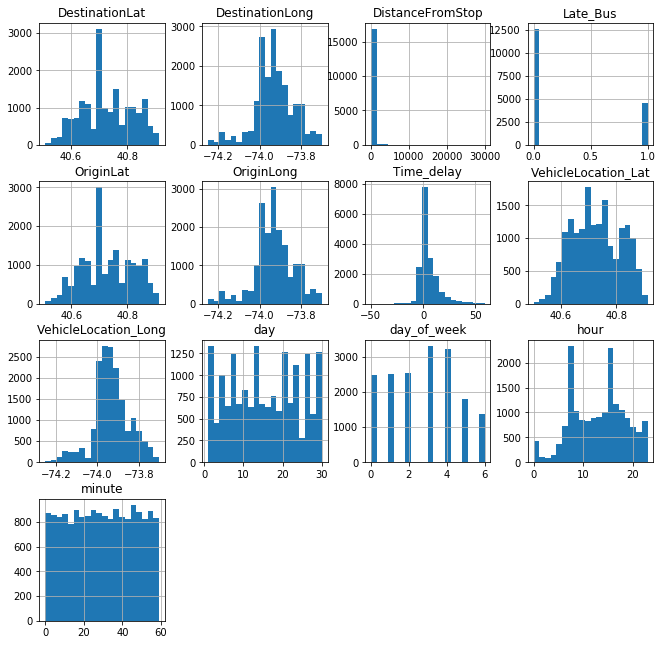

In [30]:
mta.hist(figsize=(11,11),bins=20)
plt.show()

From the histograms of our continuous features we can see that we have a very unbalanced target, which would be expected. There should definetly be more on-time busses that late ones. From here I want to look at the continuous variables for against the target.
 

In [31]:
# Test of the mean distance between stops of late and on-time busses
Late_Bus_dist = mta[mta.Late_Bus==1] 
On_Time_Bus_dist = mta[mta.Late_Bus==0] 
print(stats.ttest_ind(Late_Bus_dist.DistanceFromStop,On_Time_Bus_dist.DistanceFromStop),'\n')

# calculate correlation distance from stop and late busses
print('Correlation of distance from stops and late busses \n',mta.DistanceFromStop.corr(mta.Late_Bus))
print()
print(stats.ttest_ind(Late_Bus_dist.Time_delay,On_Time_Bus_dist.Time_delay),'\n')

 

Ttest_indResult(statistic=2.825369133375402, pvalue=0.0047280538189934255) 

Correlation of distance from stops and late busses 
 0.021532610004554243

Ttest_indResult(statistic=156.51492682118848, pvalue=0.0) 



There is a statistically significant difference in the average distance from stop of Late busses and on-time busses. There is also a positive correlation between distance from stop and late busses.

In [32]:
mta[['Time_delay','DistanceFromStop']].describe()

,Time_delay,DistanceFromStop
count,17211.000000,17211.000000
mean,5.404451,250.279879
std,9.105150,1079.042462
min,-50.000000,0.000000
25%,0.000000,33.500000
50%,3.000000,104.000000
75%,8.000000,214.000000
max,59.000000,29887.000000


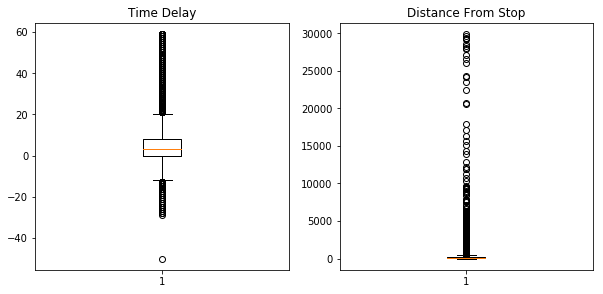

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.boxplot(mta.Time_delay)
plt.title('Time Delay')
plt.subplot(222)
plt.title('Distance From Stop')
plt.boxplot(mta.DistanceFromStop) 
plt.show()

Nothing will be done to correct the outliers in the Time Delay variable. We used this to create out target variable and it will not be used in any models. As far a the distance from stop variable we can look at winzorizing to minimize the outliers.

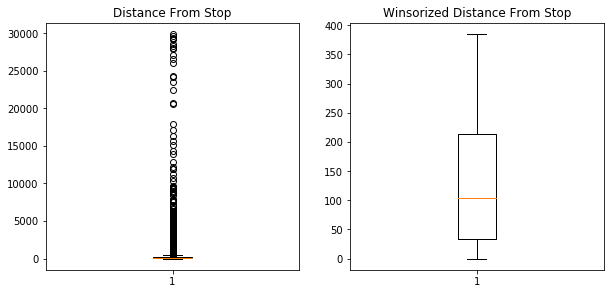

In [34]:
winsor_dist = winsorize(mta["DistanceFromStop"], (0, .1)) # one way wizorization of distance from stop 
#                                                           variable with limit set at the 90th percentile

plt.figure(figsize=(10,10))
plt.title('Distance From Stop') 
plt.subplot(221)
plt.title('Distance From Stop')
plt.boxplot(mta.DistanceFromStop) 


plt.subplot(222)
plt.title('Winsorized Distance From Stop')
plt.boxplot(winsor_dist)
plt.show()

In [35]:
# create a feature for winsorization of the distance from stops
mta['winsor_dist'] = winsor_dist 

In [36]:
mta.sample(frac=.1)[:10]

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,day,hour,minute,weekday,day_of_week,winsor_dist
7110,2017-06-13 12:54:14,0,Q85,TEARDROP/LAYOVER,40.701748,-73.802399,GREEN ACRES,40.661846,-73.723145,NYCT_8079,40.687659,-73.775878,MERRICK BL/FOCH BL,145.0,2017-06-13 12:54:46,2017-06-13 12:52:18,2.0,0,13,12,52,Tuesday,1,145.0
14251,2017-06-26 08:25:13,1,M4,FT WASHINGTON AV/CABRINI BL,40.859211,-73.934280,MIDTOWN PENN STA via BROADWAY via 5 AV,40.749435,-73.991081,NYCT_6673,40.819819,-73.955427,BROADWAY/W 133 ST,178.0,2017-06-26 08:26:32,2017-06-26 08:27:00,0.0,0,26,8,27,Monday,0,178.0
6825,2017-06-13 00:53:03,1,M57,E 60 ST/YORK AV,40.759312,-73.959465,WEST SIDE BWAY - 72 ST XTOWN,40.778767,-73.982254,NYCT_4119,40.779464,-73.983663,W 72 ST/BROADWAY,141.0,2017-06-13 00:53:39,2017-06-13 00:52:00,1.0,0,13,0,52,Tuesday,1,141.0
9394,2017-06-16 20:39:14,1,B11,FLATBUSH AV/E 31 ST,40.631992,-73.946701,SUNSET PARK 1 AV - 58 ST,40.645618,-74.023521,NYCT_7561,40.648651,-74.020724,53 ST/1 AV,8.0,2017-06-16 20:39:32,2017-06-16 20:19:11,20.0,1,16,20,19,Friday,4,8.0
15342,2017-06-27 21:08:03,0,S93,B ST/1 AV,40.598827,-74.151634,LTD BAY RIDGE 86 ST STA via VICTRY,40.621979,-74.028770,NYCT_7069,40.598911,-74.151548,COLLEGE OF SI/ROADWAY ENT,1425.0,2017-06-27 21:11:12,2017-06-27 21:13:17,-2.0,0,27,21,13,Tuesday,1,385.0
12361,2017-06-22 13:08:54,0,Bx15,3 AV/WESTCHESTER AV,40.817059,-73.916084,FORDHAM PLZ via 3 AV,40.860989,-73.890266,NYCT_5814,40.860294,-73.890978,3 AV/E FORDHAM RD,97.0,2017-06-22 13:09:17,2017-06-22 12:33:00,36.0,1,22,12,33,Thursday,3,97.0
3135,2017-06-06 14:43:34,1,B61,SMITH ST/FULTON ST,40.691208,-73.987373,PARK SLOPE 20 ST via RED HOOK,40.657574,-73.982948,NYCT_748,40.668987,-73.985925,9 ST/5 AV,0.0,2017-06-06 14:43:38,2017-06-06 14:36:00,7.0,0,6,14,36,Tuesday,1,0.0
9755,2017-06-17 16:50:55,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,LTD MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_1208,40.876246,-73.886003,GRAND CONCOURSE/BEDFORD PK BL,531.0,2017-06-17 16:53:09,2017-06-17 16:52:10,0.0,0,17,16,52,Saturday,5,385.0
10510,2017-06-19 13:54:37,1,Bx31,VAN CORTLANDT PK E/E 242 ST,40.902660,-73.868378,WESTCHESTER SQ,40.841076,-73.842850,NYCT_7661,40.856948,-73.843837,EASTCHESTER RD/PELHAM PY S,12.0,2017-06-19 13:54:48,2017-06-19 13:53:36,1.0,0,19,13,53,Monday,0,12.0
11088,2017-06-20 13:15:34,1,X1,CENTRAL PARK S/6 AV,40.766315,-73.977493,ELTNGVLE TRANST CTR via HYLAN BL RICH AV,40.560837,-74.171120,NYCT_2675,40.741727,-73.989101,E 23 ST/BROADWAY,82.0,2017-06-20 13:16:31,2017-06-20 13:07:00,9.0,1,20,13,7,Tuesday,1,82.0


# Categorical Variables

In [37]:
mta[['PublishedLineName', 'OriginName','DestinationName','VehicleRef','NextStopPointName']].describe()

,PublishedLineName,OriginName,DestinationName,VehicleRef,NextStopPointName
count,17211,17211,17211,17211,17211
unique,236,475,561,4172,5873
top,B6,E 126 ST/2 AV,WASHINGTON HTS GW BRIDGE,NYCT_4242,138 ST/37 AV
freq,325,295,225,14,38


# Late Busses and Time Delays by hour


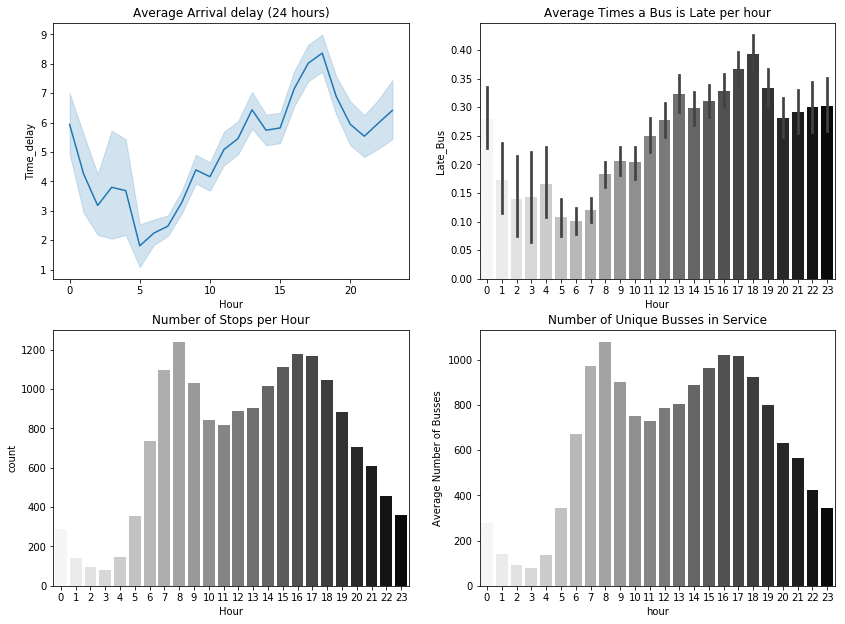

In [38]:
plt.figure(figsize=(14,16))
plt.subplot(321)
sns.lineplot(x= mta.ScheduledArrivalTime.dt.hour, 
             y=mta.Time_delay, data=mta,)
plt.title('Average Arrival delay (24 hours)') 
plt.xlabel('Hour')

plt.subplot(322)
sns.barplot(mta.ScheduledArrivalTime.dt.hour,mta[mta.DistanceFromStop<500].Late_Bus,palette= "gist_gray_r")
plt.title('Average Times a Bus is Late per hour')
plt.xlabel('Hour')

plt.subplot(323)
sns.countplot(mta.ScheduledArrivalTime.dt.hour, palette= "gist_gray_r")
plt.title('Number of Stops per Hour') 
plt.xlabel('Hour')

plt.subplot(324)
hour_df = pd.DataFrame(mta.groupby('hour').VehicleRef.unique())
hour_df = pd.DataFrame(hour_df.VehicleRef.apply(lambda x : len(x)))
plt.title('Number of Unique Busses in Service')
plt.xlabel('Hour')
plt.ylabel('Busses in Service')
hour_df['hour'] = hour_df.index
hour_df.index = range(len(hour_df))
sns.barplot(hour_df.hour, hour_df.VehicleRef, palette= "gist_gray_r")
plt.ylabel('Average Number of Busses')

plt.show()

After 6a.m. then average number of late busses steadily increases and peaks at 6p.m. It then flattens and falls between the hours of 1a.m. and 6a.m. This could be because there is less traffic at this time. 

In [39]:
index = mta[(mta.ScheduledArrivalTime.dt.hour>=8) & (mta.ScheduledArrivalTime.dt.hour<=19)].index  
mta['increased_Late'] = 0
mta.loc[index,'increased_Late'] = 1


In [40]:
mta.increased_Late.value_counts()

1    12135
0     5076
Name: increased_Late, dtype: int64

Here I am going to bin hours in to groups to form a feature that represents afternoon evening and night to caprture the differences in late busses during those times. 

In [41]:
# create time of day feature
bins=[-1, 5, 11, 16, 20, 23]
bin_names = ['night','morning','afternoon','evening','Night']
mta['time_of_day'] = pd.cut(mta.ScheduledArrivalTime.dt.hour, bins,labels=bin_names)
mta['time_of_day'] = mta['time_of_day'].str.lower().astype('category')

In [42]:
(mta.groupby(mta.time_of_day).Late_Bus.mean().sort_index(ascending=False)*100).astype(str)+" %"

time_of_day
night        24.290220820189273 %
morning      17.845993756503642 %
evening       35.59055118110236 %
afternoon    31.064914689154737 %
Name: Late_Bus, dtype: object

Afternoon and evening look to have the greatest average of late busses. Before looking I would have expected morning and evening to have the worse of the problem because of traffic at those times. Lets do a ttest to confirm that there is significant differences in the average number of late busses between each time of day.

In [43]:
# t-test between the means of the percentage of late busses of the hours in the day
tod_pvalues = {}
for i in range(len(mta.time_of_day.unique())):
        for j in range(i+1,4):
            print(mta.time_of_day.unique()[i],' vs ',mta.time_of_day
                  .unique()[j]) 
            print(stats.ttest_ind(
                mta[mta.time_of_day==mta.time_of_day.unique()[i]]['Late_Bus'], 
                mta[mta.time_of_day==mta.time_of_day.unique()[j]]['Late_Bus']))           

night  vs  morning
Ttest_indResult(statistic=6.803103548810826, pvalue=1.0948794726131699e-11)
night  vs  afternoon
Ttest_indResult(statistic=-6.170549277951211, pvalue=7.152707063972357e-10)
night  vs  evening
Ttest_indResult(statistic=-9.595013598429581, pvalue=1.1764578652167088e-21)
morning  vs  afternoon
Ttest_indResult(statistic=-16.28312700048901, pvalue=6.467532871917423e-59)
morning  vs  evening
Ttest_indResult(statistic=-20.059144207177372, pvalue=1.0477722609772258e-87)
afternoon  vs  evening
Ttest_indResult(statistic=-4.499029521053928, pvalue=6.912975958539333e-06)


 There looks to be significant diffences between each time of day.

### What percentage of busses are late per hour?


Here is a numerical representation of the graphs above.

In [44]:
(mta.groupby(mta.ScheduledArrivalTime.dt.hour).Late_Bus.mean().sort_index(ascending=False)*100).astype(str)+" %"

ScheduledArrivalTime
23     30.47091412742382 %
22     30.28322440087146 %
21    28.852459016393446 %
20     28.42998585572843 %
19     33.40857787810384 %
18     39.77055449330784 %
17     37.83091374893254 %
16    33.050127442650805 %
15    31.413141314131416 %
14     30.25540275049116 %
13     32.22958057395143 %
12     27.73393461104848 %
11     25.03052503052503 %
10     20.59171597633136 %
9     20.679611650485437 %
8     18.321226795803067 %
7     12.647861692447679 %
6      9.673024523160763 %
5     10.393258426966293 %
4      16.43835616438356 %
3                   15.0 %
2     13.829787234042554 %
1     16.901408450704224 %
0                 28.125 %
Name: Late_Bus, dtype: object

# Late Busses and Time Delays by day of the Week

In [45]:
print('Description of Late Busses Delays by Weekday')
weekday_order={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
Late_bus_mean = mta[mta.Time_delay>=0].groupby(mta.ScheduledArrivalTime.dt.weekday).Late_Bus.describe()
Late_bus_mean.index = weekday_order.values()
Late_bus_mean

Description of Late Busses Delays by Weekday


,count,mean,std,min,25%,50%,75%,max
Monday,1983.0,0.254665,0.435782,0.0,0.0,0.0,1.0,1.0
Tuesday,2110.0,0.306161,0.461007,0.0,0.0,0.0,1.0,1.0
Wednesday,2200.0,0.333182,0.471458,0.0,0.0,0.0,1.0,1.0
Thursday,2727.0,0.309498,0.462371,0.0,0.0,0.0,1.0,1.0
Friday,2727.0,0.322332,0.467455,0.0,0.0,0.0,1.0,1.0
Saturday,1539.0,0.365172,0.481635,0.0,0.0,0.0,1.0,1.0
Sunday,1189.0,0.349874,0.477131,0.0,0.0,0.0,1.0,1.0


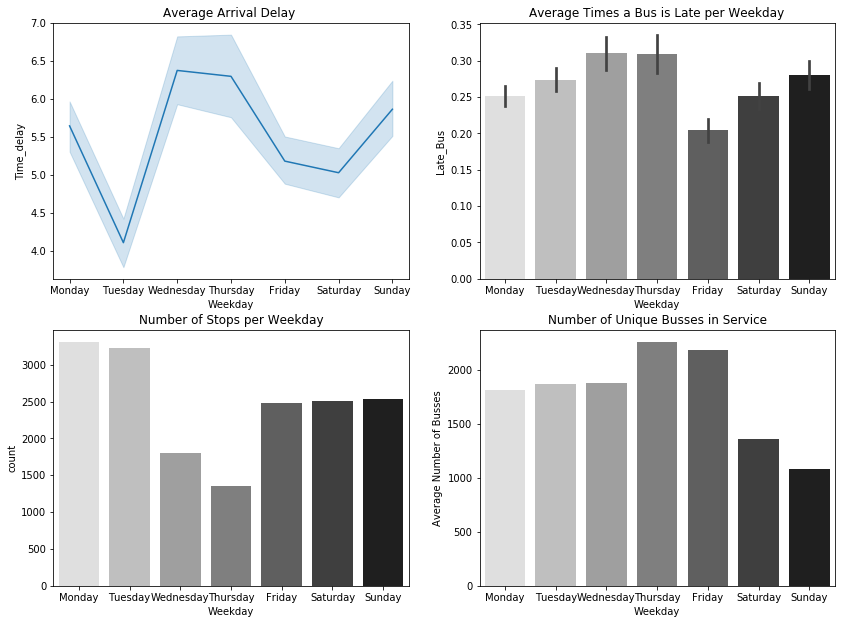

In [46]:
plt.figure(figsize=(14,16))
plt.subplot(321)
sns.lineplot(x= mta.ScheduledArrivalTime.dt.day_name(), 
             y=mta.Time_delay, data=mta)
plt.xticks(range(0,7), weekday_order.values())
plt.title('Average Arrival Delay ') 
plt.xlabel('Weekday')

plt.subplot(322)
sns.barplot(mta.ScheduledArrivalTime.dt.day_name(),mta[mta.DistanceFromStop<500].Late_Bus, palette= "gist_gray_r")
plt.title('Average Times a Bus is Late per Weekday')
plt.xticks(range(0,7), weekday_order.values())
plt.xlabel('Weekday')

plt.subplot(323)
sns.countplot(mta.ScheduledArrivalTime.dt.day_name(), palette= "gist_gray_r")
plt.xticks(range(0,7), weekday_order.values())
plt.title('Number of Stops per Weekday') 
plt.xlabel('Weekday')

plt.subplot(324)
day_df = pd.DataFrame(mta.groupby('day_of_week').VehicleRef.unique())
day_df = pd.DataFrame(day_df.VehicleRef.apply(lambda x : len(x)))
plt.title('Number of Unique Busses in Service')
plt.xlabel('Weekday')
plt.ylabel('Busses in Service')
day_df['Weekday'] = day_df.index
day_df.index = range(len(day_df))
sns.barplot(day_df.Weekday, day_df.VehicleRef,palette= "gist_gray_r")
plt.ylabel('Average Number of Busses')
plt.xticks(range(0,7),weekday_order.values())
plt.show()

In [47]:
#ttest between the means of the percentage of late busses of the days of the week
pvales = {}
for i in range(len(mta.ScheduledArrivalTime.dt.weekday.unique())):
        for j in range(i+1,7):
            print(mta.ScheduledArrivalTime.dt.day_name().unique()[i],' vs ',mta.ScheduledArrivalTime.dt.day_name().unique()[j]) 
            print(stats.ttest_ind(
                mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[i]]['Late_Bus'], 
                mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[j]]['Late_Bus']))
            pvales.update({(mta.ScheduledArrivalTime.dt.day_name().unique()[i],' vs ',mta.ScheduledArrivalTime.dt.day_name().unique()[j]):
                          stats.ttest_ind(
                          mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[i]]['Late_Bus'], 
                          mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[j]]['Late_Bus'])[1]})

Thursday  vs  Friday
Ttest_indResult(statistic=-1.5602802616953448, pvalue=0.11874211047485317)
Thursday  vs  Saturday
Ttest_indResult(statistic=-4.34573659403194, pvalue=1.4150495286645776e-05)
Thursday  vs  Sunday
Ttest_indResult(statistic=-3.5849661412079454, pvalue=0.00034057390278027897)
Thursday  vs  Monday
Ttest_indResult(statistic=4.58260631092361, pvalue=4.688713274566886e-06)
Thursday  vs  Tuesday
Ttest_indResult(statistic=-0.23281802401703489, pvalue=0.8159109201283206)
Thursday  vs  Wednesday
Ttest_indResult(statistic=-2.8626366536620043, pvalue=0.004216267341610929)
Friday  vs  Saturday
Ttest_indResult(statistic=-2.990733878460198, pvalue=0.0027965755462951015)
Friday  vs  Sunday
Ttest_indResult(statistic=-2.3527135001653203, pvalue=0.018679036289286254)
Friday  vs  Monday
Ttest_indResult(statistic=5.994132688719072, pvalue=2.1710678149255516e-09)
Friday  vs  Tuesday
Ttest_indResult(statistic=1.2166530369272877, pvalue=0.2237863656243663)
Friday  vs  Wednesday
Ttest_indRes

In [48]:
# find all comparisons with pvalues > .05
non_significant = [i for i in pvales if pvales.get(i)>.05]
non_significant

[('Thursday', ' vs ', 'Friday'),
 ('Thursday', ' vs ', 'Tuesday'),
 ('Friday', ' vs ', 'Tuesday'),
 ('Friday', ' vs ', 'Wednesday'),
 ('Saturday', ' vs ', 'Sunday'),
 ('Saturday', ' vs ', 'Wednesday'),
 ('Sunday', ' vs ', 'Wednesday')]

There is no statistcal significance in the average number of late busses between the above days of the week.
Wednesday and Thursday have the greatest average number of late busses. I will make and indicator feature to mark these days. 

In [49]:
# mark Wed and Thurs. as peak late busses
mta['is_midweek'] = 0
mta.loc[list(np.where(mta[(mta.ScheduledArrivalTime.dt.weekday==2)|(mta.ScheduledArrivalTime.dt.weekday==3)])[0]),'is_midweek'] = 1

In [50]:
mta.is_midweek.value_counts()

0    11367
1     5844
Name: is_midweek, dtype: int64

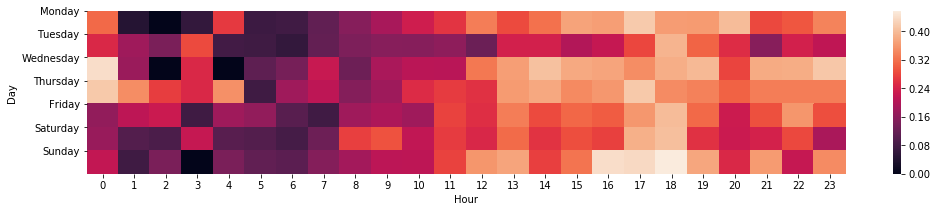

In [51]:
plt.figure(figsize=(17,3))
heat_weekdayhour = mta.pivot_table(index=mta.ScheduledArrivalTime.dt.day_name(), columns=mta.ScheduledArrivalTime.dt.hour, values="Late_Bus")
sns.heatmap(heat_weekdayhour,)
plt.xlabel('Hour')
plt.ylabel('Day')
plt.yticks(np.arange(7),weekday_order.values())
plt.show() 

The heatmap above shows the average late busses of the days of week by hour. There doesnt seem to be any significant difference between the hours that we normally associate with rush hour. it seems that there is just a steady increase of late busses from about 9:30 am up to midnight and then a lull between those times. 

# Late Busses and Time Delays by day of the Month

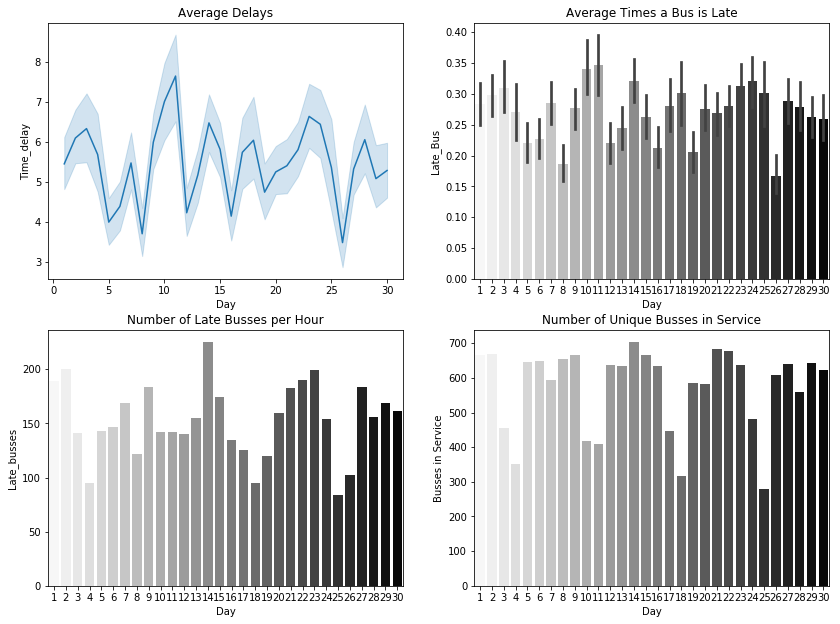

In [52]:
plt.figure(figsize=(14,16))
plt.subplot(321)
sns.lineplot(x= mta.ScheduledArrivalTime.dt.day , 
             y=mta.Time_delay, data=mta,)
plt.xlabel('Day')
plt.title('Average Delays')

plt.subplot(322)
sns.barplot(mta.ScheduledArrivalTime.dt.day,mta.Late_Bus,palette= "gist_gray_r")
plt.xlabel('Day')

plt.title('Average Times a Bus is Late')
 
plt.subplot(323)
sns.countplot(mta[mta.Late_Bus==1].ScheduledArrivalTime.dt.day , palette= "gist_gray_r")
plt.title('Number of Late Busses per Hour')
plt.xlabel('Day')

plt.ylabel('Late_busses')

plt.subplot(324)
#daydf = pd.DataFrame(mta.groupby('day').VehicleRef.unique())
#daydf = pd.DataFrame(daydf.VehicleRef.apply(lambda x : len(x)))
#daydf['day_of_month'] = daydf.index
#daydf.index = range(len(daydf))
#sns.barplot(daydf.day_of_month, daydf.VehicleRef,palette= "gist_gray_r")
sns.countplot(mta.ScheduledArrivalTime.dt.day, palette= "gist_gray_r")
plt.title('Number of Unique Busses in Service')
plt.xlabel('Day')
plt.ylabel('Busses in Service')

plt.show()

The days of the month seem to follow a weekly pattern. With the weekends having the least amount of late busses. The weekends also have fewer busses in service. The number of late busses doesn't seem to be affected by a larger number of busses in service.

In order to capture the cyclical nature of time sin/cos features of hour ,minute, and day of the week will be calculated so that the end of the cycle is show to be close to the beginning instead of far away.

In [53]:
# create sin cos features to capture cyclical nature
mta['sin_min'] = np.sin(mta['minute']*(2*np.pi/60))
mta['cos_min'] = np.cos(mta['minute']*(2*np.pi/60))
mta['sin_hour'] = np.sin(mta['hour']*(2.*np.pi/24))
mta['cos_hour'] = np.cos(mta['hour']*(2.*np.pi/24))
mta['sin_day_of_week'] = np.sin(mta['day_of_week']*(2.*np.pi/7))
mta['cos_day_of_week'] = np.cos(mta['day_of_week']*(2.*np.pi/7))

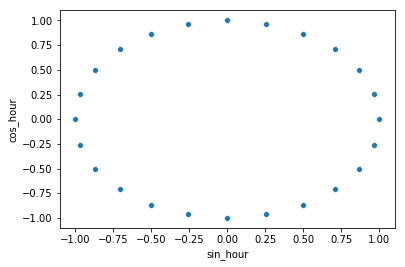

In [54]:
sns.scatterplot(mta.sin_hour,mta.cos_hour)

# Inbound and Outbound Late Busses and Delays

Let's see if there is any difference between the number of late busses of inbound vs outbound busses.

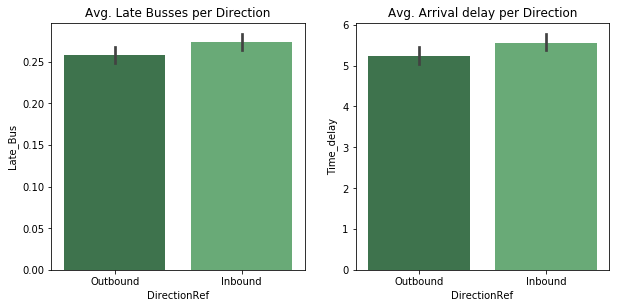

In [55]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.barplot(y=mta.Late_Bus,x=mta.DirectionRef,palette="Greens_d",orient='vertical',) 
plt.title('Avg. Late Busses per Direction')
plt.xticks(range(0,2), ['Outbound','Inbound'])

plt.subplot(222)
sns.barplot(y=mta.Time_delay,x=mta.DirectionRef,palette="Greens_d",orient='vertical',) 
plt.title('Avg. Arrival delay per Direction')
plt.xticks(range(0,2), ['Outbound','Inbound'])
plt.show()

The average number of late busses is higher with the inbound busses as well as the average arrival delay.

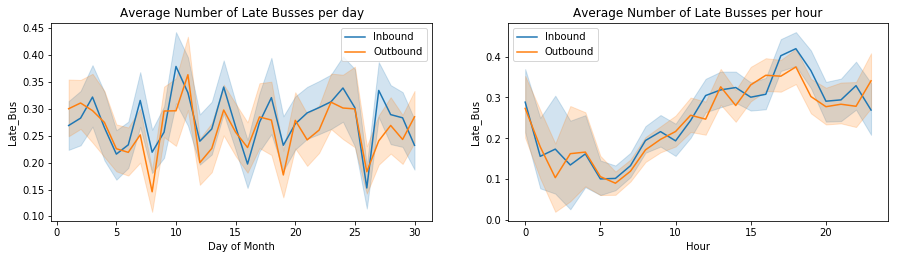

In [56]:
inbound_df = mta[mta.DirectionRef==1]
outbound_df = mta[mta.DirectionRef==0] 
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.lineplot(inbound_df.ScheduledArrivalTime.dt.day.sort_values(), inbound_df.Late_Bus, label='Inbound') 
sns.lineplot(outbound_df.ScheduledArrivalTime.dt.day.sort_values(), outbound_df.Late_Bus, label='Outbound')
plt.title('Average Number of Late Busses per day')
plt.xticks=(np.arange(0,30,.5))
plt.xlabel('Day of Month')
plt.subplot(222)
sns.lineplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.Late_Bus, label='Inbound') 
sns.lineplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.Late_Bus, label='Outbound')
plt.title('Average Number of Late Busses per hour')
plt.xlabel('Hour')
plt.xticks=(np.arange(0,30,.5))
plt.show() 

The inbound and outbound busses show the same pattern over time. With respect hour there are more late inbound busses thoughout most of the day.

In [57]:
# Test of the mean distance between stops of late and on-time busses 
print(stats.ttest_ind(inbound_df.Late_Bus, outbound_df.Late_Bus),'\n')


Ttest_indResult(statistic=2.3700992399332916, pvalue=0.01779427162382705) 



## Distance from stop vs Late Busses 

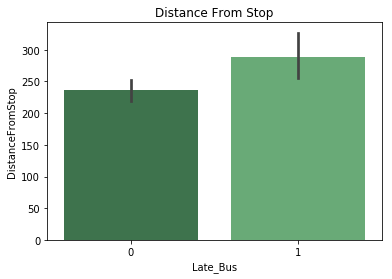

In [58]:
sns.barplot(x='Late_Bus',y='DistanceFromStop', data=mta, palette="Greens_d")
plt.title('Distance From Stop')
#plt.xticks(list(range(0,2)), ['On-Time','Late'])
plt.show()

In [59]:
print('Average distance from stop of on-time and late busses')
mta.groupby('Late_Bus').mean()[['DistanceFromStop']]

Average distance from stop of on-time and late busses


,DistanceFromStop
Late_Bus,
0,236.278869
1,288.835333


In [60]:
onTime_df = mta[mta.Late_Bus==1]
Late_df = mta[mta.Late_Bus==0] 
print('Ttest of average distance between stops of late and on-time Busses:')
print()
print(stats.ttest_ind(onTime_df.DistanceFromStop, Late_df.DistanceFromStop),'\n')

Ttest of average distance between stops of late and on-time Busses:

Ttest_indResult(statistic=2.825369133375402, pvalue=0.0047280538189934255) 



The ttest shows a significant difference between the average distance from a stop and late busses.

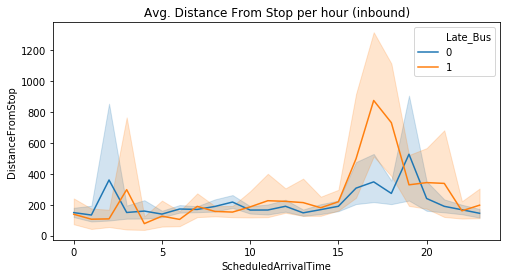

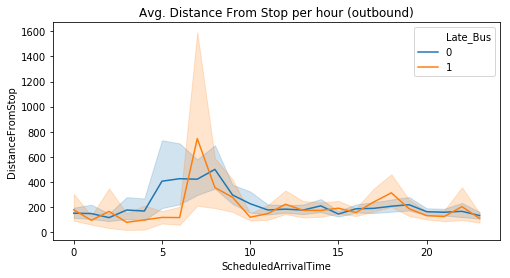

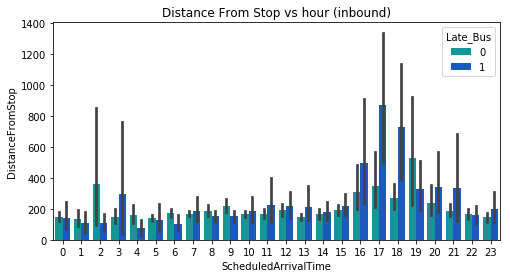

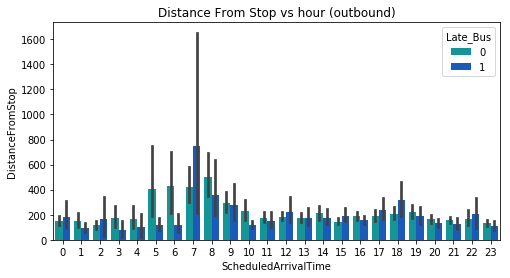

In [61]:
plt.figure(figsize=(8,4))
sns.lineplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.DistanceFromStop, hue=inbound_df.Late_Bus) 
plt.title('Avg. Distance From Stop per hour (inbound)')
plt.show()
plt.figure(figsize=(8,4))

sns.lineplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.DistanceFromStop, hue=outbound_df.Late_Bus)
plt.title('Avg. Distance From Stop per hour (outbound)')
#plt.xticks=(np.arange(0,30,.5))
plt.show() 
plt.figure(figsize=(8,4))
sns.barplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.DistanceFromStop,hue=inbound_df.Late_Bus,palette='winter_r')
plt.title('Distance From Stop vs hour (inbound)')
plt.show()
plt.figure(figsize=(8,4))
sns.barplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.DistanceFromStop,hue=outbound_df.Late_Bus,palette='winter_r')
plt.title('Distance From Stop vs hour (outbound)')
#sns.lineplot(mta.ScheduledArrivalTime.dt.hour.sort_values(), mta.DistanceFromStop, hue=mta.Late_Bus)

plt.show() 

There seems to be a pattern as the day goes on. The distacnce from stops increases for the inbound busses between 3pm and 9pm and for the outbound busses between 5am and 9am. The distance between stops for late busses is father than for the inbound busses than for the outbound. For the outbound busses it seems that distance between stops is greater for the on-time busses. This coincides with New Yorks rush hour. Since the busses are recorded approximately every ten minutes the busses are farther away from their stops for a longer amount of time because of traffic. This could possibly be why this pattern is showing. It doesn't explain the reason the distance between stops is greater for on time busses on the outbound side and the opposite for the inbound. This could be that there are more busses running at that time or that the busses are moving slower but the schedule accounts for those delays making the busses on time. 

I'm goding to create an indicator feature to mark this pattern.

In [62]:
# create rush our indicator feature
mta['rush_hour'] = np.where(np.logical_and(mta.hour>=5, mta.hour<=9) | np.logical_and(mta.hour>=15, mta.hour<=21),1,0)

## Which boroughs have the farthest distance from stop?


The route label prefixes signify the boroughs of New York that the operate in with the exception of routes that begin with "X". The "X" routes are express routes that a operate in all five boroghs and have large distances between stops. Here I will create a feature that groups the published line name(route) in to their areas of operation to condense dimentionality and for analysis.

In [63]:
# create new feature based on the route names and areas of operation based on prefix
def boroughs():
    mta['boroughs'] = '0'
    mta.loc[list(np.where((mta.PublishedLineName.str.contains('x')==False) & (mta.PublishedLineName.str.startswith('B')==True))[0]),'boroughs'] = 'Brooklyn'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('Bx')==True)[0]),'boroughs'] = 'Bronx'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('Q')==True)[0]),'boroughs'] = 'Queens'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('S')==True)[0]),'boroughs'] = 'Staten Island'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('M')==True)[0]),'boroughs'] = 'Manhattan'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('X')==True)[0]),'boroughs'] = 'X'
    mta['boroughs'] = mta.boroughs.astype('category')
boroughs()


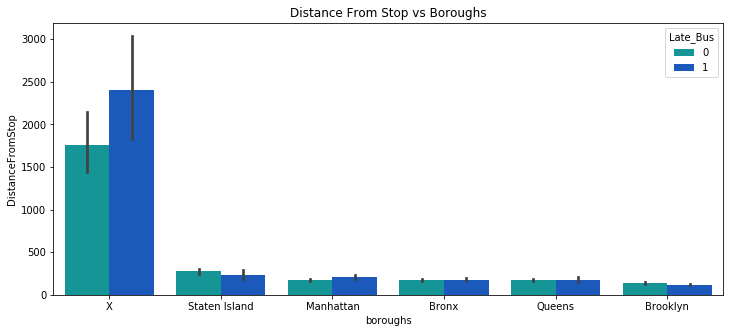

In [64]:
plt.figure(figsize=(12,5)) 
order = mta.groupby('boroughs').DistanceFromStop.mean().sort_values(ascending=False).index
sns.barplot(x='boroughs',y='DistanceFromStop' ,data=mta, hue=mta.Late_Bus,order=order,palette='winter_r')
plt.title('Distance From Stop vs Boroughs')
plt.show()

The "X" routes have the largest average distance from stops. It look like those routes are also resposible for the distance from stops for late busses being greater than the distance from stops for the on-time busses. Let's see what happens when we exclude the "X" routes.

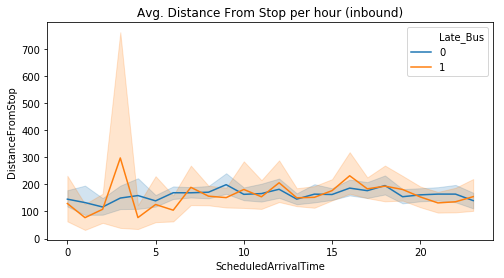

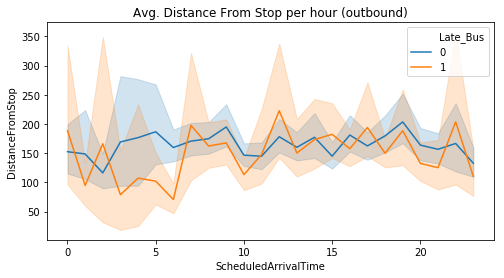

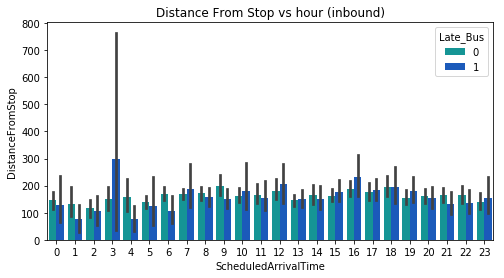

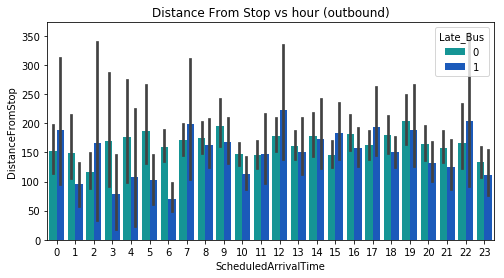

In [65]:
no_x_df = mta[mta.boroughs!='X']
inbound_df = no_x_df[no_x_df.DirectionRef==1]
outbound_df = no_x_df[no_x_df.DirectionRef==0] 

plt.figure(figsize=(8,4))
sns.lineplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.DistanceFromStop, hue=inbound_df.Late_Bus) 
plt.title('Avg. Distance From Stop per hour (inbound)')
plt.show()
plt.figure(figsize=(8,4))

sns.lineplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.DistanceFromStop, hue=outbound_df.Late_Bus)
plt.title('Avg. Distance From Stop per hour (outbound)')
#plt.xticks=(np.arange(0,30,.5))
plt.show() 
plt.figure(figsize=(8,4))
sns.barplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.DistanceFromStop,hue=inbound_df.Late_Bus,palette='winter_r')
plt.title('Distance From Stop vs hour (inbound)')
plt.show()
plt.figure(figsize=(8,4))
sns.barplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.DistanceFromStop,hue=outbound_df.Late_Bus,palette='winter_r')
plt.title('Distance From Stop vs hour (outbound)')
#sns.lineplot(mta.ScheduledArrivalTime.dt.hour.sort_values(), mta.DistanceFromStop, hue=mta.Late_Bus)

plt.show() 

Without the "X" routes the pattern pretty much disappears. This is something to be aware of when modeling because we don't want the algorithm to always focus in on the "X" routes.

In [66]:
#ttest between the means of the percentage of late busses of the days of the week
pvales = {}
for i in range(len(mta.boroughs.unique())):
        for j in range(i+1,6):
            print(mta.boroughs.unique()[i],' vs ',mta.boroughs.unique()[j]) 
            print(stats.ttest_ind(
                mta[mta.boroughs==mta.boroughs.unique()[i]]['Late_Bus'], 
                mta[mta.boroughs==mta.boroughs.unique()[j]]['Late_Bus']))
            pvales.update({(mta.boroughs.unique()[i],' vs ',mta.boroughs.unique()[j]):
                          stats.ttest_ind(
                          mta[mta.boroughs==mta.boroughs.unique()[i]]['Late_Bus'], 
                          mta[mta.boroughs==mta.boroughs.unique()[j]]['Late_Bus'])[1]})

X  vs  Queens
Ttest_indResult(statistic=4.576196356147252, pvalue=4.883213290612644e-06)
X  vs  Bronx
Ttest_indResult(statistic=4.103906882527308, pvalue=4.136919189552055e-05)
X  vs  Brooklyn
Ttest_indResult(statistic=2.4081071759363324, pvalue=0.016065014170120583)
X  vs  Manhattan
Ttest_indResult(statistic=0.9630428863119772, pvalue=0.3355814175889037)
X  vs  Staten Island
Ttest_indResult(statistic=4.580600640223705, pvalue=4.946621035167219e-06)
Queens  vs  Bronx
Ttest_indResult(statistic=-0.8153757537158265, pvalue=0.41488648667328176)
Queens  vs  Brooklyn
Ttest_indResult(statistic=-3.820298350786245, pvalue=0.0001342517650326766)
Queens  vs  Manhattan
Ttest_indResult(statistic=-5.619345523587515, pvalue=1.996197337306114e-08)
Queens  vs  Staten Island
Ttest_indResult(statistic=1.0018126351713634, pvalue=0.316492501868643)
Bronx  vs  Brooklyn
Ttest_indResult(statistic=-3.0751150222331156, pvalue=0.0021106256240832175)
Bronx  vs  Manhattan
Ttest_indResult(statistic=-4.9950563614674

In [67]:
# find all comparisons with pvalues > .05
non_significant = [i for i in pvales if pvales.get(i)>.05]
non_significant

[('X', ' vs ', 'Manhattan'),
 ('Queens', ' vs ', 'Bronx'),
 ('Queens', ' vs ', 'Staten Island'),
 ('Bronx', ' vs ', 'Staten Island')]

## Compare boroughs to late busses

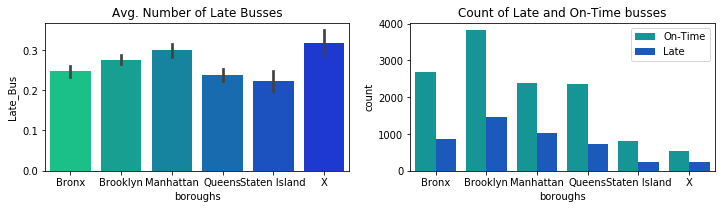

In [68]:
plt.figure(figsize=(12,6)) 
plt.subplot(221)
sns.barplot(x='boroughs',y='Late_Bus' ,data=mta,  palette='winter_r' )
plt.title('Avg. Number of Late Busses')

plt.subplot(222)
sns.countplot(x='boroughs',hue='Late_Bus' ,data=mta,  palette='winter_r' )
plt.legend(['On-Time','Late'])
plt.title('Count of Late and On-Time busses')
plt.show()

In [69]:
# chi-square test to test significance of group size
borough_count_table = pd.crosstab(mta.Late_Bus,mta.boroughs)
print('Chi-square Test Results significance of group size of boroughs')
print(stats.chisquare(borough_count_table, axis=None))


Chi-square Test Results significance of group size of boroughs
Power_divergenceResult(statistic=9816.609552030679, pvalue=0.0)


In [70]:
mta.groupby('boroughs').Late_Bus.agg(['mean','count'])

,mean,count
boroughs,,
Bronx,0.246552,3553
Brooklyn,0.275934,5302
Manhattan,0.299766,3416
Queens,0.237957,3093
Staten Island,0.222852,1059
X,0.317259,788


Although the "X" routes are represented the least in the dataset they have the highest agverage of late busses. 

#  Geospacial features

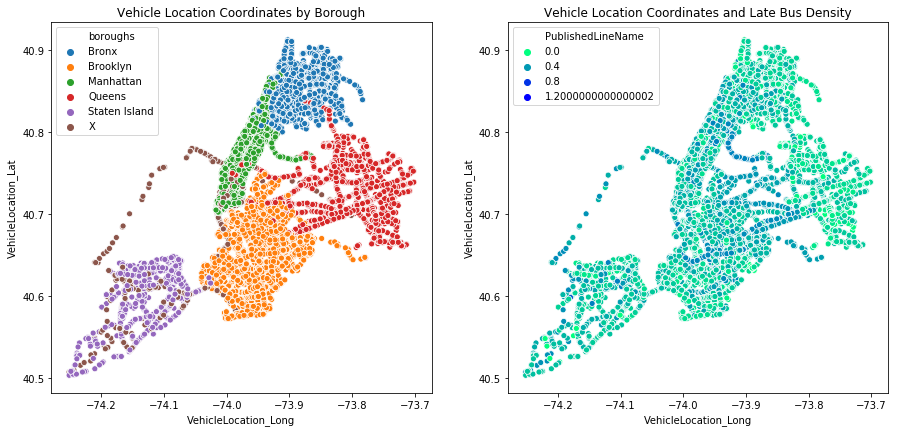

In [71]:
mean_late = mta.PublishedLineName.map(dict(mta.groupby('PublishedLineName').Late_Bus.mean().sort_values(ascending=False)))
plt.figure(figsize=(15,15))
 
plt.subplot(222)
sns.scatterplot(mta.VehicleLocation_Long,mta.VehicleLocation_Lat,hue=mean_late, palette='winter_r')
plt.title('Vehicle Location Coordinates and Late Bus Density')
 
plt.subplot(221)
sns.scatterplot(mta.VehicleLocation_Long,mta.VehicleLocation_Lat,hue=mta.boroughs)
plt.title('Vehicle Location Coordinates by Borough')
plt.show()

Above are scatterplots of the lattitudes and longitudes of the vehicle locations. You can see the shape of New York made from the lats and longs. There doesn't seem to be any points that fall far outside of the area that we are concerned with. The left plot shows the busses grouped by their respective areas of operation and the left highlights the areas where the average number of late busses is the greatest. This may indicate that vehicle location may be a good predictor of whether a bus is going to be late or not. Since there is no meaningful relationship between the raw lattitude and longitude I will create a couple of features to cut down on the dimentionality and well as creating something useful that a model such a Random Forest could use. 

In [72]:
# function to conver lat and long to zip code

def geo_to_zip(lat,long,zip_type):
    from uszipcode import SearchEngine
    from datetime import datetime
    startTime = datetime.now()
     
    search = SearchEngine(simple_zipcode=True)
    mta['col'] = mta[lat].astype(str)+' '+mta[long].astype(str)
    mta[zip_type] = mta['col'].apply(lambda x: search.by_coordinates(float(x.split()[0]),
                                    float(x.split()[1]), radius=10, returns=5)[0].values()[0])
   
    print(datetime.now() - startTime)
    print('done')
    mta.drop('col',1,inplace=True)
geo_to_zip('OriginLat', 'OriginLong','Orig_zip')
geo_to_zip('DestinationLat','DestinationLong','Dest_zip')
geo_to_zip('VehicleLocation_Lat','VehicleLocation_Long','VL_Zip')

0:05:08.933543
done
0:05:14.079054
done
0:05:16.992354
done


In [73]:

# fucntion to convert to compute distance between two points and create a columns of those distances
def distance_between_points(lat1,long1,lat2,long2,to_from):
    import mpu
    from datetime import datetime
    startTime = datetime.now()
    mta['point1'] =mta[lat1].astype(str)+" "+mta[long1].astype(str)
    mta['point2'] = mta[lat2].astype(str)+" "+mta[long2].astype(str)

    mta[to_from] = mta['point1']+" "+mta['point2']
    mta[to_from] = mta[to_from].apply(lambda x : mpu.haversine_distance((float(x.split()[0]), float(x.split()[1])),
                                                                              (float(x.split()[2]), float(x.split()[3]))))
    mta.drop('point1',1,inplace=True)
    mta.drop('point2',1,inplace=True)
    print(datetime.now() - startTime)
    print('done')
    return;


distance_between_points('VehicleLocation_Lat','VehicleLocation_Long','DestinationLat','DestinationLong','VL_to_Dest')
distance_between_points('VehicleLocation_Lat','VehicleLocation_Long','OriginLat', 'OriginLong','VL_to_Origin')
distance_between_points('DestinationLat','DestinationLong','OriginLat', 'OriginLong','Dest_to_Origin') 

0:00:00.331123
done
0:00:00.342187
done
0:00:00.326251
done


In [74]:
# winsorizing the distances to reduce outliers
mta["winVL_to_Dest"]  = winsorize(mta["VL_to_Dest"], (0, .1)) 
mta["winVL_to_Origin"] =winsor_distVL= winsorize(mta["VL_to_Origin"], (0, .1)) 
mta["winDest_to_Origin"] =winsor_distOD= winsorize(mta["Dest_to_Origin"], (0, .1))

In [75]:
#create geohash features from lat and long
import pygeohash as gh
mta['VL_geohash']=mta.apply(lambda x: gh.encode(x.VehicleLocation_Lat, x.VehicleLocation_Long, precision=5), axis=1).astype('category')
mta['O_geohash']=mta.apply(lambda x: gh.encode(x.OriginLat, x.OriginLong, precision=5), axis=1).astype('category')
mta['D_geohash']=mta.apply(lambda x: gh.encode(x.DestinationLat, x.DestinationLong, precision=5), axis=1).astype('category')

In [76]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,day,hour,minute,weekday,day_of_week,winsor_dist,increased_Late,time_of_day,is_midweek,sin_min,cos_min,sin_hour,cos_hour,sin_day_of_week,cos_day_of_week,rush_hour,boroughs,Orig_zip,Dest_zip,VL_Zip,VL_to_Dest,VL_to_Origin,Dest_to_Origin,winVL_to_Dest,winVL_to_Origin,winDest_to_Origin,VL_geohash,O_geohash,D_geohash
0,2017-06-01 00:03:30,1,X17,E 57 ST/3 AV,40.760429,-73.967674,ARDEN HTS HUGENOT AV via NJ via DRMGOOLE,40.543644,-74.196716,NYCT_2725,40.563053,-74.175912,ARTHUR KILL RD/ANNADALE RD,157.0,2017-06-01 00:03:56,2017-06-01 00:01:32,2.0,0,1,0,1,Thursday,3,157.0,0,night,1,0.104528,0.994522,0.0,1.0,0.433884,-0.900969,0,X,10022,10312,10312,2.783357,28.110445,30.893679,2.783357,9.965182,14.301103,dr5qb,dr5ru,dr5nx
1,2017-06-01 00:13:31,0,Q30,ARCHER AV /SUTPHIN BL,40.700489,-73.807884,LITTLE NECK L NECK PKY,40.764297,-73.725914,NYCT_8443,40.764774,-73.725227,NASSAU BL/LITTLE NECK PY,77.0,2017-06-01 00:13:57,2017-06-01 00:02:00,11.0,1,1,0,2,Thursday,3,77.0,0,night,1,0.207912,0.978148,0.0,1.0,0.433884,-0.900969,0,Queens,11435,11005,11005,0.078491,9.980095,9.901728,0.078491,9.965182,9.901728,dr5xf,dr5x8,dr5xf
2,2017-06-01 00:03:40,1,Bx36,RANDALL AV/OLMSTEAD AV,40.818676,-73.851555,WASHINGTON HTS GW BRIDGE,40.849033,-73.937309,NYCT_281,40.822321,-73.855112,LAFAYETTE AV/PUGSLEY AV,29.0,2017-06-01 00:03:56,2017-06-01 00:02:51,1.0,0,1,0,2,Thursday,3,29.0,0,night,1,0.207912,0.978148,0.0,1.0,0.433884,-0.900969,0,Bronx,10473,10032,10473,7.526045,0.503847,7.965199,7.526045,0.503847,7.965199,dr72p,dr72p,dr72m
3,2017-06-01 00:13:47,0,Q17,MERRICK BL/ARCHER AV,40.704906,-73.793304,FLUSHING MAIN ST STA,40.761745,-73.829529,NYCT_8417,40.740906,-73.787620,HORACE HARDING EXP/185 ST,162.0,2017-06-01 00:14:07,2017-06-01 00:09:53,4.0,0,1,0,9,Thursday,3,162.0,0,night,1,0.809017,0.587785,0.0,1.0,0.433884,-0.900969,0,Queens,11433,11354,11365,4.222787,4.031574,7.018643,4.222787,4.031574,7.018643,dr5xb,dr5x8,dr5rz
4,2017-06-01 00:13:38,0,B38,TILLARY ST/CADMAN PZ E,40.696106,-73.990364,RIDGEWOOD METRO AV,40.713341,-73.914688,NYCT_7228,40.687247,-73.976757,FULTON ST/LAFAYETTE AV,10.0,2017-06-01 00:13:57,2017-06-01 00:14:50,0.0,0,1,0,14,Thursday,3,10.0,0,night,1,0.994522,0.104528,0.0,1.0,0.433884,-0.900969,0,Brooklyn,11201,11237,11217,5.983077,1.512116,6.660744,5.983077,1.512116,6.660744,dr5rk,dr5rs,dr5rw


# Preprcessing and Modeling

In [78]:

# import need libraries for models
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import ensemble 
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# fucntion to plot AUC/ROC curve and score
def AUC_ROC_plot(model,X_train,y_train,X_test,y_test,color): 
    model.fit(X_train , y_train)
    y_prob = cross_val_predict(model, X_test, y_test, method='predict_proba',cv=5)    
    auc = roc_auc_score(y_test,y_prob[:,1])
    print('AUC: %.3f' % auc)
    fpr, tpr,thresholds = roc_curve(y_test,y_prob[:,1])
    plt.plot(fpr,tpr,color)    
    plt.plot([0.0,1.0],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics')
    plt.xlim([0.0,1.0])     
    plt.ylim([0.0,1.0])
    return;
 
# function to print metrics for comparison 
def Metrics(model, X_train , y_train, X_test, y_test,):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test) 
    y_prob = cross_val_predict(model, X_test, y_test, method='predict_proba',cv=5)    
    auc = roc_auc_score(y_test,y_prob[:,1])  
   
    print()
    print("Consfusion Matrix")
    print(pd.crosstab(y_test,y_pred))
    print()

    # Classification report
    print("Classification Report")
    from sklearn.metrics import classification_report   
    target_names = ['On-time','Late']
    print(classification_report(y_test,y_pred, target_names=target_names))    
    print("Train Score",model.score(X_train, y_train))
    print("Test Score",model.score(X_test, y_test))
    print("Recall Score",recall_score(y_test,y_pred))
    AUC_ROC_plot(model,X_train,y_train,X_test,y_test,'r')
    plt.show() 
    return;

# the next four fuctions convert features

# convert categorical to target mean in the training set
def cat_to_mean(X_train,X_test,cols=[]):
    X_trainC =  X_train.copy()
    X_testC =  X_test.copy()
    for col in X_trainC[cols]:
        Xmap = dict(X_train.groupby([col]).Late_Bus.mean())
        X_trainC[col] = X_trainC[col].map(Xmap)
        X_testC[col] =X_testC[col].map(Xmap)
        X_trainC.replace([np.inf, -np.inf], 0, inplace=True)
        X_testC.replace([np.inf, -np.inf], 0, inplace=True)
        X_trainC.fillna(0, inplace=True)
        X_testC.fillna(0, inplace=True)     

    return X_trainC, X_testC;

 

# convert categorical feature to the counts in the training set
def cat_to_count(X_train,X_test,cols=[]):
    X_trainC = X_train.copy()
    X_testC =  X_test.copy()
    for col in X_trainC[cols]:
        Xmap = dict(X_trainC[col].value_counts())
        X_trainC[col] = X_trainC[col].map(Xmap)
        X_testC[col] = X_testC[col].map(Xmap)
        X_trainC.replace([np.inf, -np.inf], 0, inplace=True)
        X_testC.replace([np.inf, -np.inf], 0, inplace=True)
        X_trainC.fillna(0, inplace=True)
        X_testC.fillna(0, inplace=True)
 
    return X_trainC, X_testC;

 

In [79]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime', 'Time_delay', 'Late_Bus',
       'day', 'hour', 'minute', 'weekday', 'day_of_week', 'winsor_dist',
       'increased_Late', 'time_of_day', 'is_midweek', 'sin_min', 'cos_min',
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'rush_hour', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'VL_to_Dest',
       'VL_to_Origin', 'Dest_to_Origin', 'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash'],
      dtype='object')

Some of the features will be dropped initally because eithere the are redundant or they were used to create the target variable. These features are: 'RecordedAtTime','DistanceFromStop','ExpectedArrivalTime', 'ScheduledArrivalTime', 'Time_delay', 'day', 'hour', 'minute',  'OriginLat', 'OriginLong','VehicleLocation_Lat','VehicleLocation_Long','Orig_zip', 'Dest_zip', 'VL_Zip'.

There are some features that may be redundant but I'm not sure which will add more predictive power over the others so they will be left in and eliminated during feature selection.

In [80]:
# categorical features description
mta[mta.select_dtypes('category').columns].describe()

,DirectionRef,PublishedLineName,OriginName,DestinationName,VehicleRef,NextStopPointName,weekday,time_of_day,boroughs,VL_geohash,O_geohash,D_geohash
count,17211,17211,17211,17211,17211,17211,17211,17211,17211,17211,17211,17211
unique,2,236,475,561,4172,5873,7,4,6,69,58,58
top,1,B6,E 126 ST/2 AV,WASHINGTON HTS GW BRIDGE,NYCT_4242,138 ST/37 AV,Thursday,morning,Brooklyn,dr5ru,dr72m,dr72m
freq,8676,325,295,225,14,38,3306,5766,5302,1386,1213,1122


Since there are a features that have a very large cardinality those features will be converted to counts instead of One-hot-encoding to reduce dimensionality and still retain some information. 

In [109]:
modeling_df = mta[['Late_Bus', 'DirectionRef',  
        'weekday',   'winsor_dist', 
       'increased_Late', 'time_of_day', 'is_midweek', 
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'rush_hour', 'boroughs', 'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash']]
 

dummies = ['time_of_day','weekday', 'boroughs', ]
counts = ['VL_geohash', 'O_geohash', 'D_geohash', ]

modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)
 
X  = modeling_df
Y = modeling_df.Late_Bus

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)  

In [110]:
# count transformation 
X_train, X_test  = cat_to_count(X_train,X_test,counts)

In [111]:
X_train.head()

,Late_Bus,DirectionRef,winsor_dist,increased_Late,is_midweek,sin_hour,cos_hour,sin_day_of_week,cos_day_of_week,rush_hour,winVL_to_Dest,winVL_to_Origin,winDest_to_Origin,VL_geohash,O_geohash,D_geohash,time_of_day_evening,time_of_day_morning,time_of_day_night,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,boroughs_Brooklyn,boroughs_Manhattan,boroughs_Queens,boroughs_Staten Island,boroughs_X
9110,0,0,19.0,1,0,1.224647e-16,-1.000000,-0.433884,-0.900969,0,0.020788,5.001193,5.001092,320,962,501,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6048,1,1,91.0,1,0,-9.659258e-01,-0.258819,-0.781831,0.623490,1,1.770377,7.452457,8.501800,768,487,417,1,0,0,0,0,1,0,0,0,1,0,0,0,0
6825,0,1,141.0,0,0,0.000000e+00,1.000000,0.781831,0.623490,0,0.141710,3.028818,2.891874,1089,180,855,0,0,1,0,0,0,0,1,0,0,1,0,0,0
9411,0,1,47.0,0,0,-7.071068e-01,0.707107,-0.433884,-0.900969,1,3.710918,2.826763,6.479320,146,114,694,0,0,1,0,0,0,0,0,0,0,0,1,0,0
10765,0,0,204.0,0,0,-5.000000e-01,0.866025,0.000000,1.000000,0,5.559632,0.808703,6.266285,494,730,121,0,0,1,1,0,0,0,0,0,0,0,1,0,0


Next we'll take at a look at the correlations of the variables to the target.

In [112]:
# find correlations to target
corr_matrix = X_train.corr().abs()
corr_to_target = corr_matrix['Late_Bus'].sort_values(ascending=False)



In [113]:
# drop the target from independent features
X_train.drop('Late_Bus',1,inplace=True)
X_test.drop('Late_Bus',1,inplace=True)

In [114]:
# top 30 features with the highest correlations to target
corr_to_target[:30]

Late_Bus                  1.000000
winVL_to_Origin           0.210330
sin_hour                  0.179964
time_of_day_morning       0.143644
winVL_to_Dest             0.138866
time_of_day_evening       0.109833
increased_Late            0.096487
winDest_to_Origin         0.086794
O_geohash                 0.072495
weekday_Monday            0.067995
VL_geohash                0.044438
cos_day_of_week           0.037012
boroughs_Manhattan        0.036694
weekday_Saturday          0.034882
boroughs_Staten Island    0.030883
weekday_Sunday            0.030010
D_geohash                 0.029890
boroughs_Queens           0.029043
sin_day_of_week           0.028891
boroughs_X                0.024644
time_of_day_night         0.023140
winsor_dist               0.021438
boroughs_Brooklyn         0.014485
weekday_Wednesday         0.012435
weekday_Tuesday           0.008386
weekday_Thursday          0.008086
is_midweek                0.005948
rush_hour                 0.004310
cos_hour            

The highest correation with the target is the distance to the origin and it really isn't that high. Next I'll use SelcectKbest to choose the top 30 of our list of almost 2000 features. Since there were many rare levels in the categorical features I expect many of the features from OHE to be constant.

In [115]:
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13768, 29)
(13768,)
(3443, 29)
(3443,)


In [116]:
# Automatic feature selection with SelectKbest
import sklearn.feature_selection 
select =sklearn.feature_selection.SelectKBest(k='all')
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X_train.columns[i] for i in indicies_selected]
X_selected = X_train[colnames_selected]
print(colnames_selected)
#X = X[colnames_selected]
#X = X[colnames_selected]
 
X_train = X_train[colnames_selected]
X_test = X_test[colnames_selected]

['DirectionRef', 'winsor_dist', 'increased_Late', 'is_midweek', 'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week', 'rush_hour', 'winVL_to_Dest', 'winVL_to_Origin', 'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash', 'time_of_day_evening', 'time_of_day_morning', 'time_of_day_night', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'boroughs_Brooklyn', 'boroughs_Manhattan', 'boroughs_Queens', 'boroughs_Staten Island', 'boroughs_X']


In [117]:
names = X.drop('Late_Bus',1).columns.values[select.get_support()]
scores = select.scores_[select.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                Feat_names    F_Scores
10         winVL_to_Origin  637.178912
4                 sin_hour  460.763846
16     time_of_day_morning  290.025352
9            winVL_to_Dest  270.680939
15     time_of_day_evening  168.090397
2           increased_Late  129.361931
11       winDest_to_Origin  104.489602
13               O_geohash   72.729756
18          weekday_Monday   63.939928
12              VL_geohash   27.238056
7          cos_day_of_week   18.884147
25      boroughs_Manhattan   18.560312
19        weekday_Saturday   16.770200
27  boroughs_Staten Island   13.141760
20          weekday_Sunday   12.408470
14               D_geohash   12.310071
26         boroughs_Queens   11.621021
6          sin_day_of_week   11.500209
28              boroughs_X    8.365773
17       time_of_day_night    7.375176
1              winsor_dist    6.329326
0             DirectionRef    4.428816
24       boroughs_Brooklyn    2.889097
23       weekday_Wednesday    2.129050
22         weekday_Tuesda

Next, to cut down dimentionality a little more, I am going to select the features with F-scores greater than 40.

In [118]:
Keep = list(ns_df_sorted.iloc[list(np.where(ns_df_sorted.F_Scores>0)[0]),:].Feat_names.values)
Keep

['winVL_to_Origin',
 'sin_hour',
 'time_of_day_morning',
 'winVL_to_Dest',
 'time_of_day_evening',
 'increased_Late',
 'winDest_to_Origin',
 'O_geohash',
 'weekday_Monday',
 'VL_geohash',
 'cos_day_of_week',
 'boroughs_Manhattan',
 'weekday_Saturday',
 'boroughs_Staten Island',
 'weekday_Sunday',
 'D_geohash',
 'boroughs_Queens',
 'sin_day_of_week',
 'boroughs_X',
 'time_of_day_night',
 'winsor_dist',
 'DirectionRef',
 'boroughs_Brooklyn',
 'weekday_Wednesday',
 'weekday_Tuesday',
 'weekday_Thursday',
 'is_midweek',
 'rush_hour',
 'cos_hour']

In [119]:
X_train = X_train[Keep]
X_test = X_test[Keep]

In [120]:
X_train.head()

,winVL_to_Origin,sin_hour,time_of_day_morning,winVL_to_Dest,time_of_day_evening,increased_Late,winDest_to_Origin,O_geohash,weekday_Monday,VL_geohash,cos_day_of_week,boroughs_Manhattan,weekday_Saturday,boroughs_Staten Island,weekday_Sunday,D_geohash,boroughs_Queens,sin_day_of_week,boroughs_X,time_of_day_night,winsor_dist,DirectionRef,boroughs_Brooklyn,weekday_Wednesday,weekday_Tuesday,weekday_Thursday,is_midweek,rush_hour,cos_hour
9110,5.001193,1.224647e-16,0,0.020788,0,1,5.001092,962,0,320,-0.900969,0,0,0,0,501,0,-0.433884,0,0,19.0,0,0,0,0,0,0,0,-1.000000
6048,7.452457,-9.659258e-01,0,1.770377,1,1,8.501800,487,0,768,0.623490,0,0,0,1,417,0,-0.781831,0,0,91.0,1,1,0,0,0,0,1,-0.258819
6825,3.028818,0.000000e+00,0,0.141710,0,0,2.891874,180,0,1089,0.623490,1,0,0,0,855,0,0.781831,0,1,141.0,1,0,0,1,0,0,0,1.000000
9411,2.826763,-7.071068e-01,0,3.710918,0,0,6.479320,114,0,146,-0.900969,0,0,0,0,694,1,-0.433884,0,1,47.0,1,0,0,0,0,0,1,0.707107
10765,0.808703,-5.000000e-01,0,5.559632,0,0,6.266285,730,1,494,1.000000,0,0,0,0,121,1,0.000000,0,1,204.0,0,0,0,0,0,0,0,0.866025


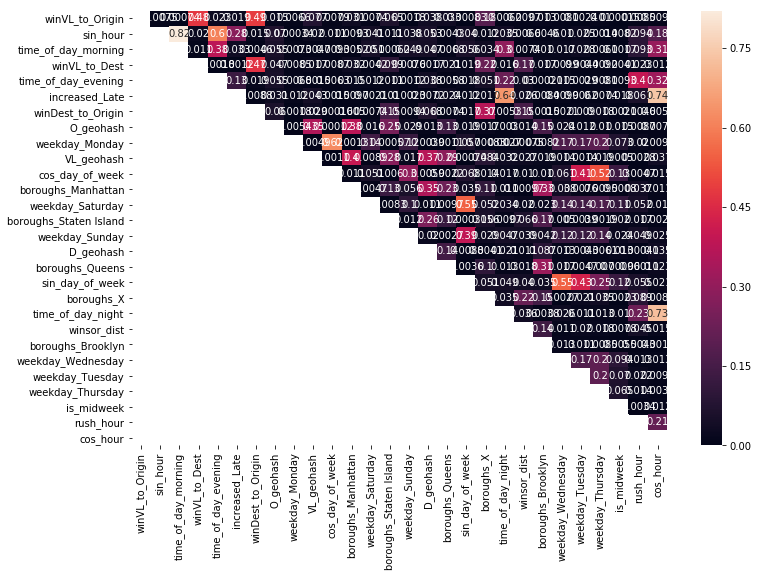

In [121]:
corr_matrix = X_train.corr().abs().where(np.triu(np.ones(X_train.corr().abs().shape), k=1).astype(np.bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

Here I will check for and drop features that are highly correlated with each other.

In [122]:
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.50)]
print('Columns to drop: ' , (len(to_drop)))
to_drop

Columns to drop:  8


['time_of_day_morning',
 'time_of_day_evening',
 'cos_day_of_week',
 'sin_day_of_week',
 'time_of_day_night',
 'weekday_Wednesday',
 'weekday_Thursday',
 'cos_hour']

In [123]:
X_train.drop(to_drop,1,inplace=True)
X_test.drop(to_drop,1,inplace=True)


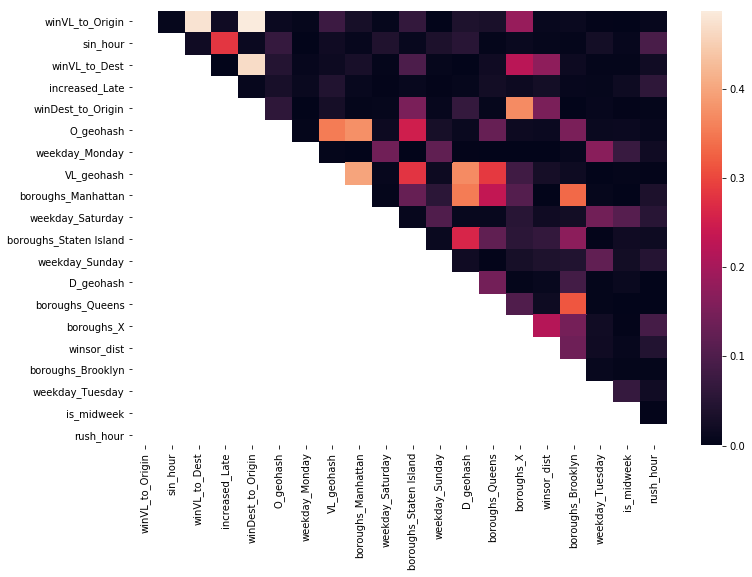

In [124]:
corr_matrix = X_train.corr().abs().where(np.triu(np.ones(X_train.corr().abs().shape), k=1).astype(np.bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=False)
plt.show()

In [125]:
X_train.head()

,winVL_to_Origin,sin_hour,winVL_to_Dest,increased_Late,winDest_to_Origin,O_geohash,weekday_Monday,VL_geohash,boroughs_Manhattan,weekday_Saturday,boroughs_Staten Island,weekday_Sunday,D_geohash,boroughs_Queens,boroughs_X,winsor_dist,DirectionRef,boroughs_Brooklyn,weekday_Tuesday,is_midweek,rush_hour
9110,5.001193,1.224647e-16,0.020788,1,5.001092,962,0,320,0,0,0,0,501,0,0,19.0,0,0,0,0,0
6048,7.452457,-9.659258e-01,1.770377,1,8.501800,487,0,768,0,0,0,1,417,0,0,91.0,1,1,0,0,1
6825,3.028818,0.000000e+00,0.141710,0,2.891874,180,0,1089,1,0,0,0,855,0,0,141.0,1,0,1,0,0
9411,2.826763,-7.071068e-01,3.710918,0,6.479320,114,0,146,0,0,0,0,694,1,0,47.0,1,0,0,0,1
10765,0.808703,-5.000000e-01,5.559632,0,6.266285,730,1,494,0,0,0,0,121,1,0,204.0,0,0,0,0,0


In [126]:
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13768, 21)
(13768,)
(3443, 21)
(3443,)


In [127]:
# balance class using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=20)
X_trainB, y_trainB = sm.fit_sample(X_train, y_train)

In [128]:
# scale
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_train)
X_trainS = sclr.transform(X_trainB)
X_testS = sclr.transform(X_test)


Random_Forest


Consfusion Matrix
col_0        0    1
Late_Bus           
0         2270  244
1          697  232

Classification Report
              precision    recall  f1-score   support

     On-time       0.77      0.90      0.83      2514
        Late       0.49      0.25      0.33       929

    accuracy                           0.73      3443
   macro avg       0.63      0.58      0.58      3443
weighted avg       0.69      0.73      0.69      3443

Train Score 0.98828125
Test Score 0.7266918385129247
Recall Score 0.24973089343379978
AUC: 0.652


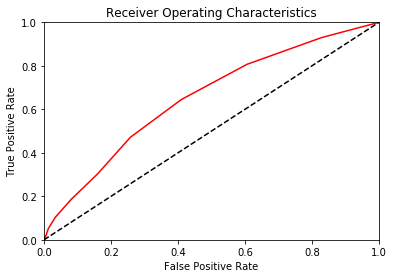

0:00:00
Gradient_Boost


Consfusion Matrix
col_0        0    1
Late_Bus           
0         2257  257
1          664  265

Classification Report
              precision    recall  f1-score   support

     On-time       0.77      0.90      0.83      2514
        Late       0.51      0.29      0.37       929

    accuracy                           0.73      3443
   macro avg       0.64      0.59      0.60      3443
weighted avg       0.70      0.73      0.71      3443

Train Score 0.8275810917721519
Test Score 0.7325007261109497
Recall Score 0.2852529601722282
AUC: 0.700


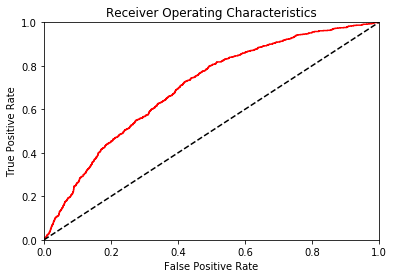

0:00:00


In [129]:
models = [] 
 
models.append(('Random_Forest' , ensemble.RandomForestClassifier(n_estimators=10,class_weight='balanced',random_state=20)))  

models.append(('Gradient_Boost' , ensemble.GradientBoostingClassifier()))
 
 
 
for name ,model in models:
    
    print(str(name))
    print()
    startTime = datetime.now()  
 
    Metrics(model, X_trainS , y_trainB, X_testS, y_test)
    startTime = datetime.now()  
    print(datetime.now() - startTime)

Logistic Regression


Consfusion Matrix
col_0        0    1
Late_Bus           
0         1595  919
1          317  612

Classification Report
              precision    recall  f1-score   support

     On-time       0.83      0.63      0.72      2514
        Late       0.40      0.66      0.50       929

    accuracy                           0.64      3443
   macro avg       0.62      0.65      0.61      3443
weighted avg       0.72      0.64      0.66      3443

Train Score 0.6513053797468354
Test Score 0.6410107464420564
Recall Score 0.658772874058127
AUC: 0.692


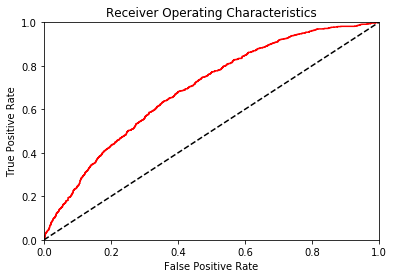

0:00:00


In [130]:
 
lr = LogisticRegression(solver='liblinear',class_weight='balanced')
AUCscore = {}
Recallscore = {}
 
 
print('Logistic Regression')
print()
startTime = datetime.now()  

Metrics(lr, X_trainS , y_trainB, X_testS, y_test)
startTime = datetime.now()  
startTime = datetime.now()  
print(datetime.now() - startTime)


In [131]:
print(cross_val_score(lr, X_train, y_train, cv=10))

[0.6298984  0.64949202 0.64488017 0.63398693 0.64778504 0.66013072
 0.62136628 0.63953488 0.63662791 0.63372093]


In [132]:
d = { 'Features': X_train.columns,'Coefficients': lr.coef_[0]}
df = pd.DataFrame(data=d)
df[df.Coefficients!=0].sort_values(by='Coefficients',ascending=False)[:20]
 

,Features,Coefficients
0,winVL_to_Origin,0.270346
4,winDest_to_Origin,0.262710
3,increased_Late,0.138027
5,O_geohash,0.116596
16,DirectionRef,0.051987
9,weekday_Saturday,0.049998
11,weekday_Sunday,0.049765
7,VL_geohash,0.037264
12,D_geohash,0.033774
8,boroughs_Manhattan,0.020373


In [ ]:
# initiate GridsearchCV for best parameters
from sklearn.model_selection import GridSearchCV
def gridsearch(model, X_trainS , y_trainB, param_grid):    
    grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', return_train_score=True,verbose=1)
    grid.fit(X_train , y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    

    
rfc =  ensemble.RandomForestClassifier(n_estimators=10,random_state=20,warm_start=True)     
param_grid = { 'n_estimators': range(2,30),'max_depth' : range(1,10)}

gridsearch(rfc, X_train , y_train, param_grid)


Consfusion Matrix
col_0        0     1
Late_Bus            
0         1364  1150
1          298   631

Classification Report
              precision    recall  f1-score   support

     On-time       0.82      0.54      0.65      2514
        Late       0.35      0.68      0.47       929

    accuracy                           0.58      3443
   macro avg       0.59      0.61      0.56      3443
weighted avg       0.69      0.58      0.60      3443

Train Score 0.6855221518987342
Test Score 0.5794365379029915
Recall Score 0.6792249730893434
AUC: 0.697


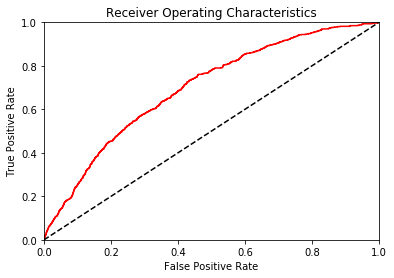

In [137]:
rfc = ensemble.RandomForestClassifier(max_features='auto',max_depth=4, max_leaf_nodes=2,n_estimators=200,class_weight='balanced',random_state=20)
Metrics(rfc, X_trainS , y_trainB, X_testS, y_test)

In [ ]:
param_grid = param_grid = {'solver':['lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':range(120,300,5),  'warm_start' :[True]}
gridsearch(lr, X_train , y_train, param_grid)




Consfusion Matrix
col_0        0    1
Late_Bus           
0         1596  918
1          317  612

Classification Report
              precision    recall  f1-score   support

     On-time       0.83      0.63      0.72      2514
        Late       0.40      0.66      0.50       929

    accuracy                           0.64      3443
   macro avg       0.62      0.65      0.61      3443
weighted avg       0.72      0.64      0.66      3443

Train Score 0.6513053797468354
Test Score 0.6413011908219576
Recall Score 0.658772874058127
AUC: 0.692


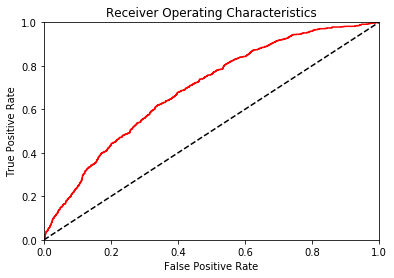

In [135]:
lr = LogisticRegression(max_iter=60, solver= 'sag', warm_start= True)
Metrics(lr, X_trainS , y_trainB, X_testS, y_test)

In [ ]:
param_grid ={'loss':[‘deviance’, ‘exponential’], 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt'],
             'max_depth':range(2,12,1)}
clf = ensemble.GradientBoostingClassifier('warm_start':(True))
gridsearch(clf, X_train , y_train, param_grid)

Random_Forest


Consfusion Matrix
col_0        0    1
Late_Bus           
0         2102  412
1          578  351

Classification Report
              precision    recall  f1-score   support

     On-time       0.78      0.84      0.81      2514
        Late       0.46      0.38      0.41       929

    accuracy                           0.71      3443
   macro avg       0.62      0.61      0.61      3443
weighted avg       0.70      0.71      0.70      3443

Train Score 0.825899920886076
Test Score 0.7124600638977636
Recall Score 0.37782561894510225
AUC: 0.713


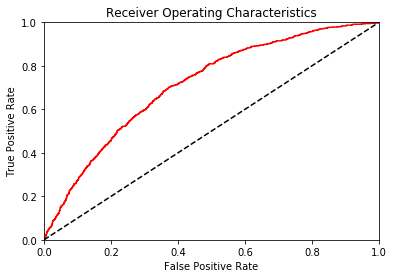

0:00:00
Gradient_Boost


Consfusion Matrix
col_0        0    1
Late_Bus           
0         2205  309
1          621  308

Classification Report
              precision    recall  f1-score   support

     On-time       0.78      0.88      0.83      2514
        Late       0.50      0.33      0.40       929

    accuracy                           0.73      3443
   macro avg       0.64      0.60      0.61      3443
weighted avg       0.70      0.73      0.71      3443

Train Score 0.9998516613924051
Test Score 0.7298867266918385
Recall Score 0.33153928955866524
AUC: 0.682


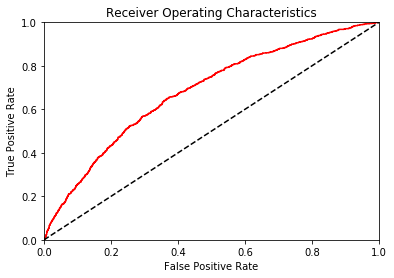

0:00:00


In [136]:
models = [] 
 
models.append(('Random_Forest' , ensemble.RandomForestClassifier(max_features='auto',max_depth=8,n_estimators=500,class_weight='balanced',random_state=20)))  

models.append(('Gradient_Boost' , ensemble.GradientBoostingClassifier(max_features='auto',max_depth=8,n_estimators=500,random_state=20)))
 
 
 
for name ,model in models:
    
    print(str(name))
    print()
    startTime = datetime.now()  
 
    Metrics(model, X_trainS , y_trainB, X_testS, y_test)
    startTime = datetime.now()  
    print(datetime.now() - startTime)

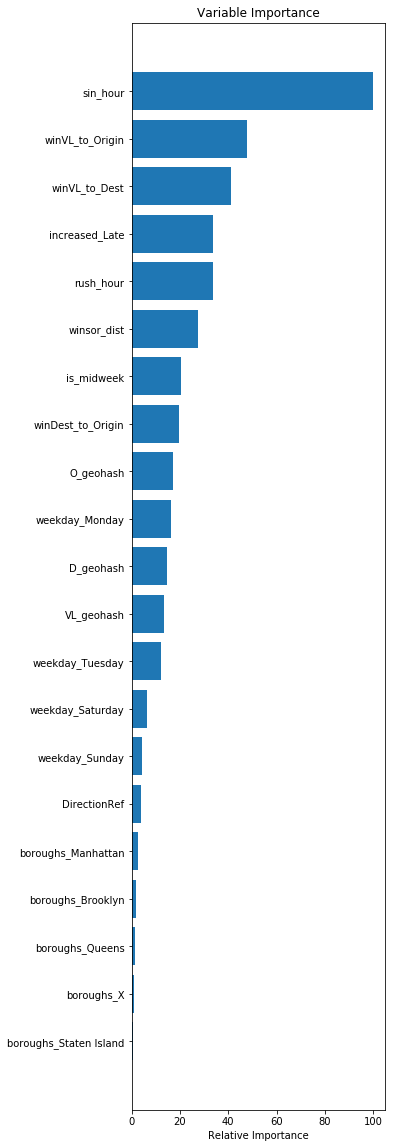

In [138]:
feature_importance = model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### LASSO

In [ ]:
modeling_df = mta[['DirectionRef', 'PublishedLineName', 'OriginName',
                   'DestinationName', 'NextStopPointName','Late_Bus','VehicleRef',
                   'weekday', 'day_of_week', 'winsor_dist','increased_Late', 'time_of_day', 
                   'is_midweek', 'sin_min', 'cos_min','sin_hour', 'cos_hour',
                   'sin_day_of_week', 'cos_day_of_week','boroughs', 'rush_hour', 
                    'winVL_to_Dest', 'winVL_to_Origin',
                   'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash']]
 

dummies = ['PublishedLineName',  'time_of_day','OriginName',  'DestinationName','VL_geohash', 'O_geohash', 'D_geohash',
         'weekday', 'boroughs']
counts = ['NextStopPointName','VehicleRef']

modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)
 
X  = modeling_df
Y = modeling_df.Late_Bus

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)  

# count encoding 
X_train, X_test = cat_to_count(X_train,X_test,counts) 

X_train.drop('Late_Bus',1,inplace=True)
X_test.drop('Late_Bus',1,inplace=True)

# balance class
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=20)
X_trainB, y_trainB = ros.fit_sample(X_train, y_train)
 


# scale
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_trainB)
X_trainS = sclr.transform(X_trainB)
X_testS = sclr.transform(X_test)
 

Train_Score =  []
Test_Score =  []
Recall_Score =  []
ii = []



In [ ]:
for i in np.arange(.001,.01,.001):
            
    model = LogisticRegression(penalty='l1',solver='liblinear',max_iter=20,C=i, warm_start=True)
    model.fit(X_trainS, y_trainB)
    y_pred = model.predict(X_testS) 
    print("Train Score",model.score(X_trainS, y_trainB))
    print("Test Score",model.score(X_testS, y_test))
    print("Recall Score",recall_score(y_test,y_pred))
    print(i)
    Train_Score.append(model.score(X_trainS, y_trainB))
    Test_Score.append(model.score(X_testS, y_test))
    Recall_Score.append(recall_score(y_test,y_pred))
    ii.append(i)
    print()
    #Metrics(model, X_trainS , y_trainB, X_testS, y_test)

In [ ]:
plt.plot(ii,Train_Score) 
plt.plot(ii,Test_Score)
plt.plot(ii,Recall_Score)

In [ ]:
winDest_to_Origin	0.260979
5	winVL_to_Origin	0.179478
2	increased_Late	0.157029
1	day_of_week	0.151220
0	NextStopPointName	0.102824
9	PublishedLineName_M60-SBS	0.084452
16	Orig_zip_11211	0.082668
14	D_geohash_dr5rq	0.069259
8	PublishedLineName_B41	0.067010
7	PublishedLineName_B35	0.057717

In [ ]:
d = { 'Features': X_train.columns,'Coefficients': model.coef_[0]}
df = pd.DataFrame(data=d)
df.sort_values(by='Coefficients',ascending=False)
#df[df.Features=='PublishedLineName_M42']

### PCA

In [ ]:
modeling_df = mta[['Late_Bus','DirectionRef', 'PublishedLineName', 'OriginName','DestinationName',           
                   'NextStopPointName','VehicleRef','weekday', 'day_of_week', 'winsor_dist',
                   'increased_Late', 'time_of_day', 'is_midweek', 'sin_min', 'cos_min',
                   'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week','boroughs', 
                   'rush_hour', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'winVL_to_Dest', 'winVL_to_Origin',
                   'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash',
                   'stops_hour']]

dummies = ['PublishedLineName',  'time_of_day','OriginName',  'DestinationName','VL_geohash', 'O_geohash', 'D_geohash',
           'weekday', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip', ]

counts = ['NextStopPointName','VehicleRef']

modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)
 
X  = modeling_df.drop('Late_Bus',1)
Y = modeling_df.Late_Bus
 

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)  

In [ ]:
# convert to counts 
X_train, X_test = cat_to_count(X_train,X_test,counts) 

In [ ]:
#Random over_sample
ros = RandomOverSampler(random_state=20)
X_trainB, y_trainB = ros.fit_sample(X_train, y_train)


In [ ]:
# scale
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_train)
X_trainS = sclr.transform(X_trainB)
X_testS = sclr.transform(X_test)
#from sklearn.preprocessing import normalize
#X_trainS = normalize(X_trainB)
#X_testS = normalize(X_test)


In [ ]:
#pca
pca = PCA(n_components =2 , random_state=20)
pca.fit(X_train)  
X_train = pca.fit_transform(X_trainS)
X_test = pca.transform(X_testS)

In [ ]:
PCALATE = pd.DataFrame(data = X_train, columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'])

In [ ]:
for i in range(0, X_train.shape[0]):
    if y_trainB[i] == 0:
      c1 = plt.scatter(X_train[i,0],X_train[i,1],c='r',    marker='+')
    elif y_trainB[i] == 1:
      c2 = plt.scatter(X_train[i,0],X_train[i,1],c='g',    marker='o')
    
plt.legend([c1, c2], ['On_time', 'Late'   ])
plt.title('Iris training dataset with 3 classes and    known outcomes')
plt.show()

In [ ]:
models = []

 
models.append(('Random_Forest' , ensemble.RandomForestClassifier(max_features= 'auto',criterion='gini', max_depth=1,n_estimators=500,
                                                                  class_weight='balanced',random_state=20)))
startTime = datetime.now()
models.append(('Logistic_Regression' , LogisticRegression(penalty='l1',solver='liblinear',max_iter=300,C=1)))
 
models.append(('Gradient_Boost' , ensemble.GradientBoostingClassifier(n_estimators=300,random_state=20)))
 
AUCscore = {}
Recallscore = {}
 
for name ,model in models:    
    print(str(name))
    print()
    Metrics(model, X_train , y_trainB, X_test, y_test)
    

In [ ]:
# initiate GridsearchCV for best parameters
from sklearn.model_selection import GridSearchCV
def gridsearch(model, X_train , y_train, param_grid):    
    grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', return_train_score=True,verbose=.5)
    grid.fit(X_train , y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    
    
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
 gridsearch(model, X_train , y_train, param_grid)

In [ ]:
#complexity vs error

train = []
test = []
ii = []


for n in np.arange(1,20,1):

    import sklearn.feature_selection 
    select =sklearn.feature_selection.SelectKBest(k=n)
    selected_features = select.fit(X_train, y_train)
    indicies_selected = selected_features.get_support(indices=True)
    colnames_selected = [X_train.columns[i] for i in indicies_selected]
    X_selected = X_train[colnames_selected]
    print(colnames_selected)
    #X = X[colnames_selected]
    #X = X[colnames_selected]

    X_trainc = X_train[colnames_selected]
    X_testc = X_test[colnames_selected]
    
    import imblearn
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=20)
    X_trainc, y_trainc = ros.fit_sample(X_trainc, y_train)

    
    
    from sklearn.preprocessing import StandardScaler
    sclr = StandardScaler()
    sclr.fit(X_trainc)
    X_trainc = sclr.transform(X_trainc)
    X_testc = sclr.transform(X_testc)
 

    
    model = LogisticRegression(penalty='l1',solver='liblinear',max_iter=500,C=1)
    model.fit(X_trainc , y_trainc)
    print(str(name))
    print()
    y_pred = model.predict(X_testc) 
    y_prob = cross_val_predict(model, X_testc, y_test, method='predict_proba',cv=5)    
    print(roc_auc_score(y_test,y_prob[:,1])) 
    print("Train Score",model.score(X_trainc, y_trainc))
    print("Test Score",model.score(X_testc, y_test))
    train.append(model.score(X_trainc, y_trainc))
    test.append(model.score(X_testc, y_test))
    ii.append(n)
plt.plot(train)
plt.plot(test)

In [ ]:
mta.Dest_to_Origin

In [ ]:
#opimized




modeling_df = mta[[  'DirectionRef', 'PublishedLineName', 'OriginName',
        'DestinationName',   
        'NextStopPointName','Late_Bus',
        
        'weekday', 'day_of_week', 'winsor_dist',
       'increased_Late', 'time_of_day', 'is_midweek', 'sin_min', 'cos_min',
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'boroughs', 'rush_hour', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash',
        ]]
modeling_df = mta[['Late_Bus','PublishedLineName']]

dummies = ['PublishedLineName',  'time_of_day','OriginName',  'DestinationName','VL_geohash', 'O_geohash', 'D_geohash',
         'weekday', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'NextStopPointName']
dummies = ['PublishedLineName']
counts = ['NextStopPointName','VehicleRef']

modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)
 
X  = modeling_df
Y = modeling_df.Late_Bus